> 1. 데이터 로딩 및 준비

In [1]:
import pandas as pd
import numpy as np

패키지 불러오기

In [2]:
#데이터 로딩
EPL_df = pd.read_csv('최근 10년간 EPL 경기결과.csv')

In [3]:
print(EPL_df.columns.values)

['round' 'HomeTeam' 'AwayTeam' 'FHG' 'FAG' 'FR' 'HHG' 'HAG' 'HR' 'HSC'
 'ASC' 'HSIP' 'ASIP' 'HFC' 'AFC' 'HCC' 'ACC' 'HYC' 'AYC' 'HRC' 'ARC']


저희는 csv 자료 안에서 심판이라는 특성을 제외하고 패키지를 불러왔습니다.
현재 기술의 발전으로 인해 VAR이라는 비디오 판독 도입이 많아져서 심판이 경기에 미치는 영향이 이전에 비해 많이 줄어들었기 때문입니다.

> 2. 데이터 파악

In [4]:
#preview the data
EPL_df.head()

,round,HomeTeam,AwayTeam,FHG,FAG,FR,HHG,HAG,HR,HSC,...,HSIP,ASIP,HFC,AFC,HCC,ACC,HYC,AYC,HRC,ARC
0,1,Aston Villa,Wigan,0,2,A,0,1,A,11,...,5,7,15,14,4,6,2,2,0,0
1,1,Blackburn,Man City,0,2,A,0,1,A,17,...,9,5,12,9,5,4,2,1,0,0
2,1,Bolton,Sunderland,0,1,A,0,1,A,11,...,3,13,16,10,4,7,2,1,0,0
3,1,Chelsea,Hull,2,1,H,1,1,D,26,...,12,3,13,15,12,4,1,2,0,0
4,1,Everton,Arsenal,1,6,A,0,3,A,8,...,5,9,11,13,4,9,0,0,0,0


데이터 미리보기

In [5]:
EPL_df.describe()

,round,FHG,FAG,HHG,HAG,HSC,ASC,HSIP,ASIP,HFC,AFC,HCC,ACC,HYC,AYC,HRC,ARC
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,19.500000,1.570526,1.180000,0.691579,0.522368,14.181316,11.229211,6.014211,4.763947,10.618684,11.133421,6.028158,4.774211,1.478421,1.771316,0.059474,0.087105
std,10.967299,1.322363,1.160788,0.838739,0.735319,5.514299,4.687029,3.443571,2.891895,3.397368,3.580877,3.131663,2.737833,1.198647,1.284515,0.244206,0.294804
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,19.500000,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,29.000000,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,13.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,38.000000,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,24.000000,26.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000


데이터 통계(평균, 표준편차 등)

> 3. 분석 준비: 데이터 결측 처리

In [6]:
#EPL_df[EPL_df.Date.isnull()] #결측이 있는 행을 찾음

#결측 즉 nall이 들어간 정보가 있는 행을 찾음
df = pd.DataFrame(EPL_df)
df.head()

,round,HomeTeam,AwayTeam,FHG,FAG,FR,HHG,HAG,HR,HSC,...,HSIP,ASIP,HFC,AFC,HCC,ACC,HYC,AYC,HRC,ARC
0,1,Aston Villa,Wigan,0,2,A,0,1,A,11,...,5,7,15,14,4,6,2,2,0,0
1,1,Blackburn,Man City,0,2,A,0,1,A,17,...,9,5,12,9,5,4,2,1,0,0
2,1,Bolton,Sunderland,0,1,A,0,1,A,11,...,3,13,16,10,4,7,2,1,0,0
3,1,Chelsea,Hull,2,1,H,1,1,D,26,...,12,3,13,15,12,4,1,2,0,0
4,1,Everton,Arsenal,1,6,A,0,3,A,8,...,5,9,11,13,4,9,0,0,0,0


In [7]:
df.isnull().sum()
#isnull 함수를 통해 null 값이 없다는 것을 확인했다.

round       0
HomeTeam    0
AwayTeam    0
FHG         0
FAG         0
FR          0
HHG         0
HAG         0
HR          0
HSC         0
ASC         0
HSIP        0
ASIP        0
HFC         0
AFC         0
HCC         0
ACC         0
HYC         0
AYC         0
HRC         0
ARC         0
dtype: int64

저희는 결측이 있는 행이 없기 때문에 NaN이라는 결과가 안나온다.

In [8]:
#EPL_df = EPL_df.dropna() #레코드의 대부분이 결측이므로 레코드를 삭제
EPL_df = df.dropna()
EPL_df.head()

,round,HomeTeam,AwayTeam,FHG,FAG,FR,HHG,HAG,HR,HSC,...,HSIP,ASIP,HFC,AFC,HCC,ACC,HYC,AYC,HRC,ARC
0,1,Aston Villa,Wigan,0,2,A,0,1,A,11,...,5,7,15,14,4,6,2,2,0,0
1,1,Blackburn,Man City,0,2,A,0,1,A,17,...,9,5,12,9,5,4,2,1,0,0
2,1,Bolton,Sunderland,0,1,A,0,1,A,11,...,3,13,16,10,4,7,2,1,0,0
3,1,Chelsea,Hull,2,1,H,1,1,D,26,...,12,3,13,15,12,4,1,2,0,0
4,1,Everton,Arsenal,1,6,A,0,3,A,8,...,5,9,11,13,4,9,0,0,0,0


> 4. 데이터 시각화

In [9]:
#시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

패키지 불러오기

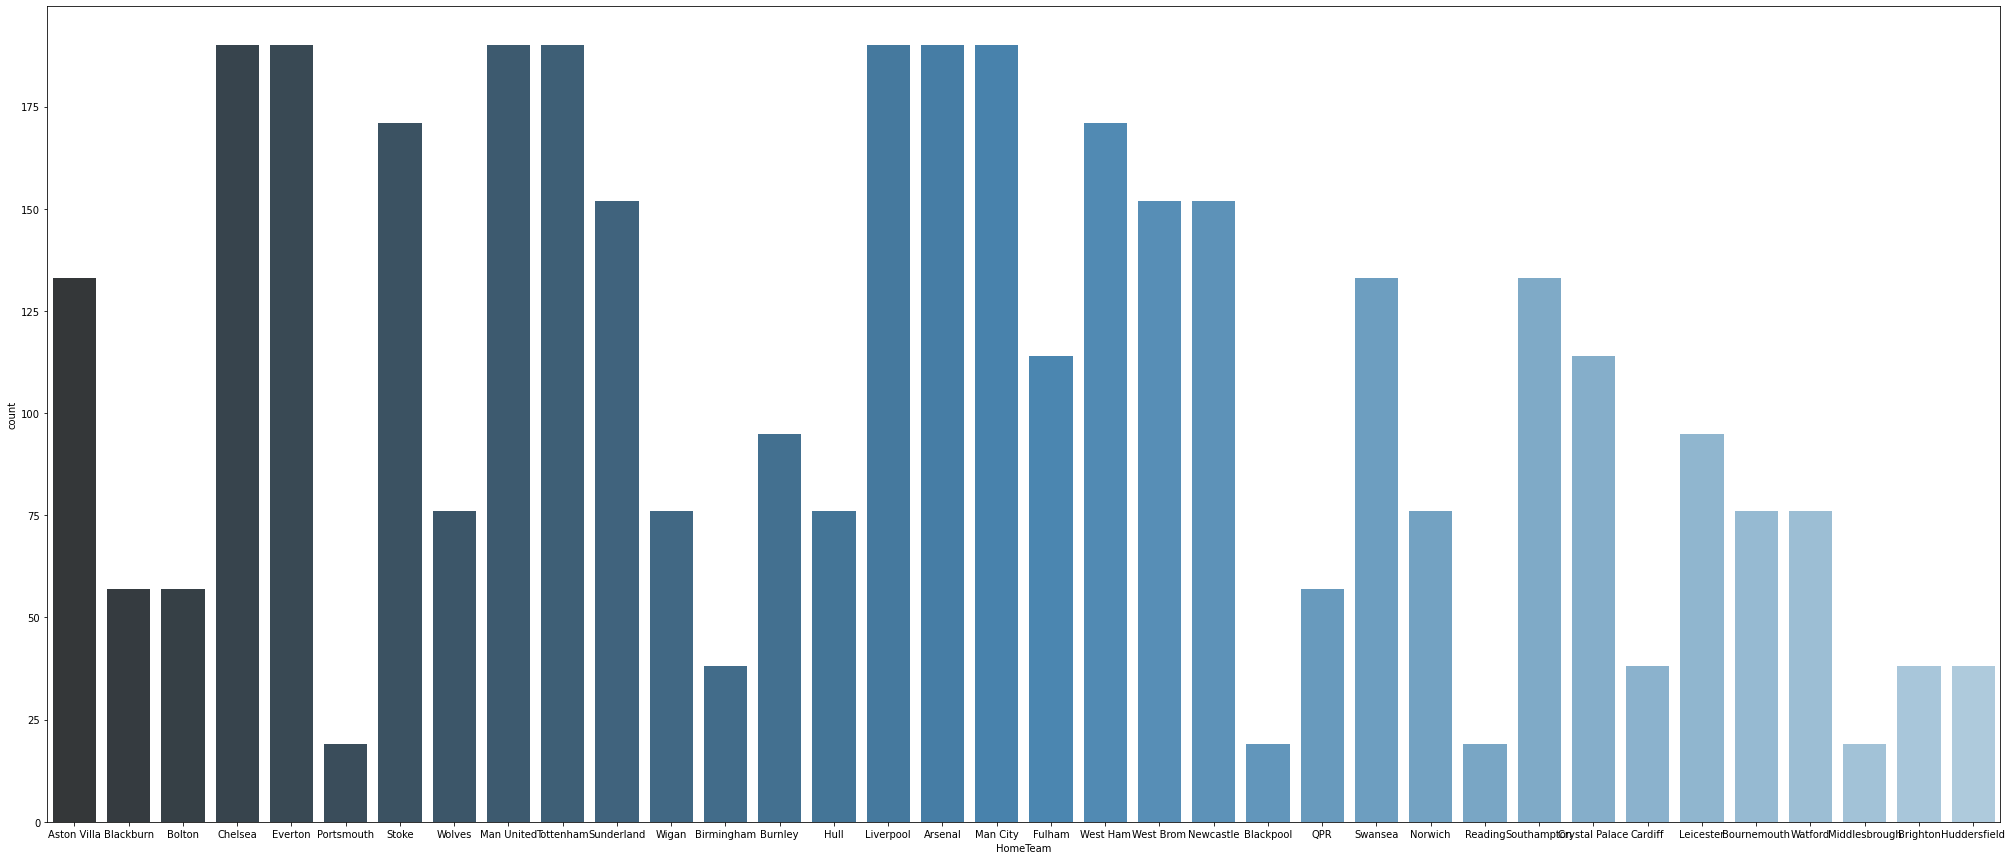

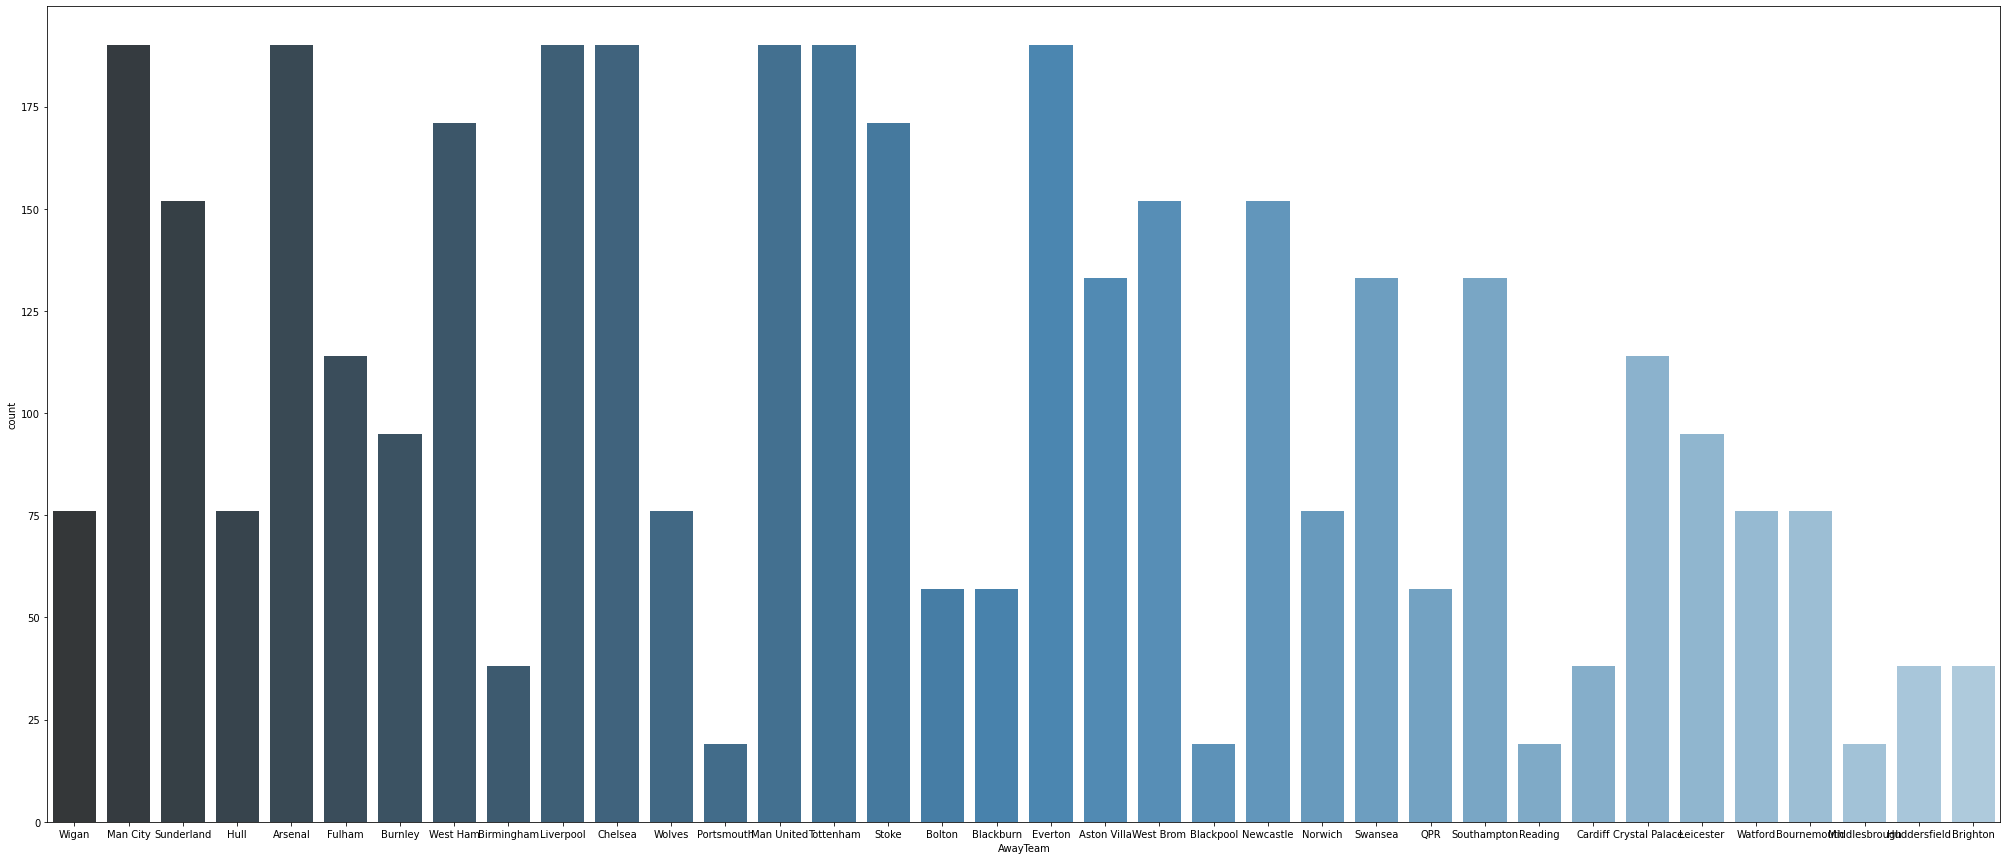

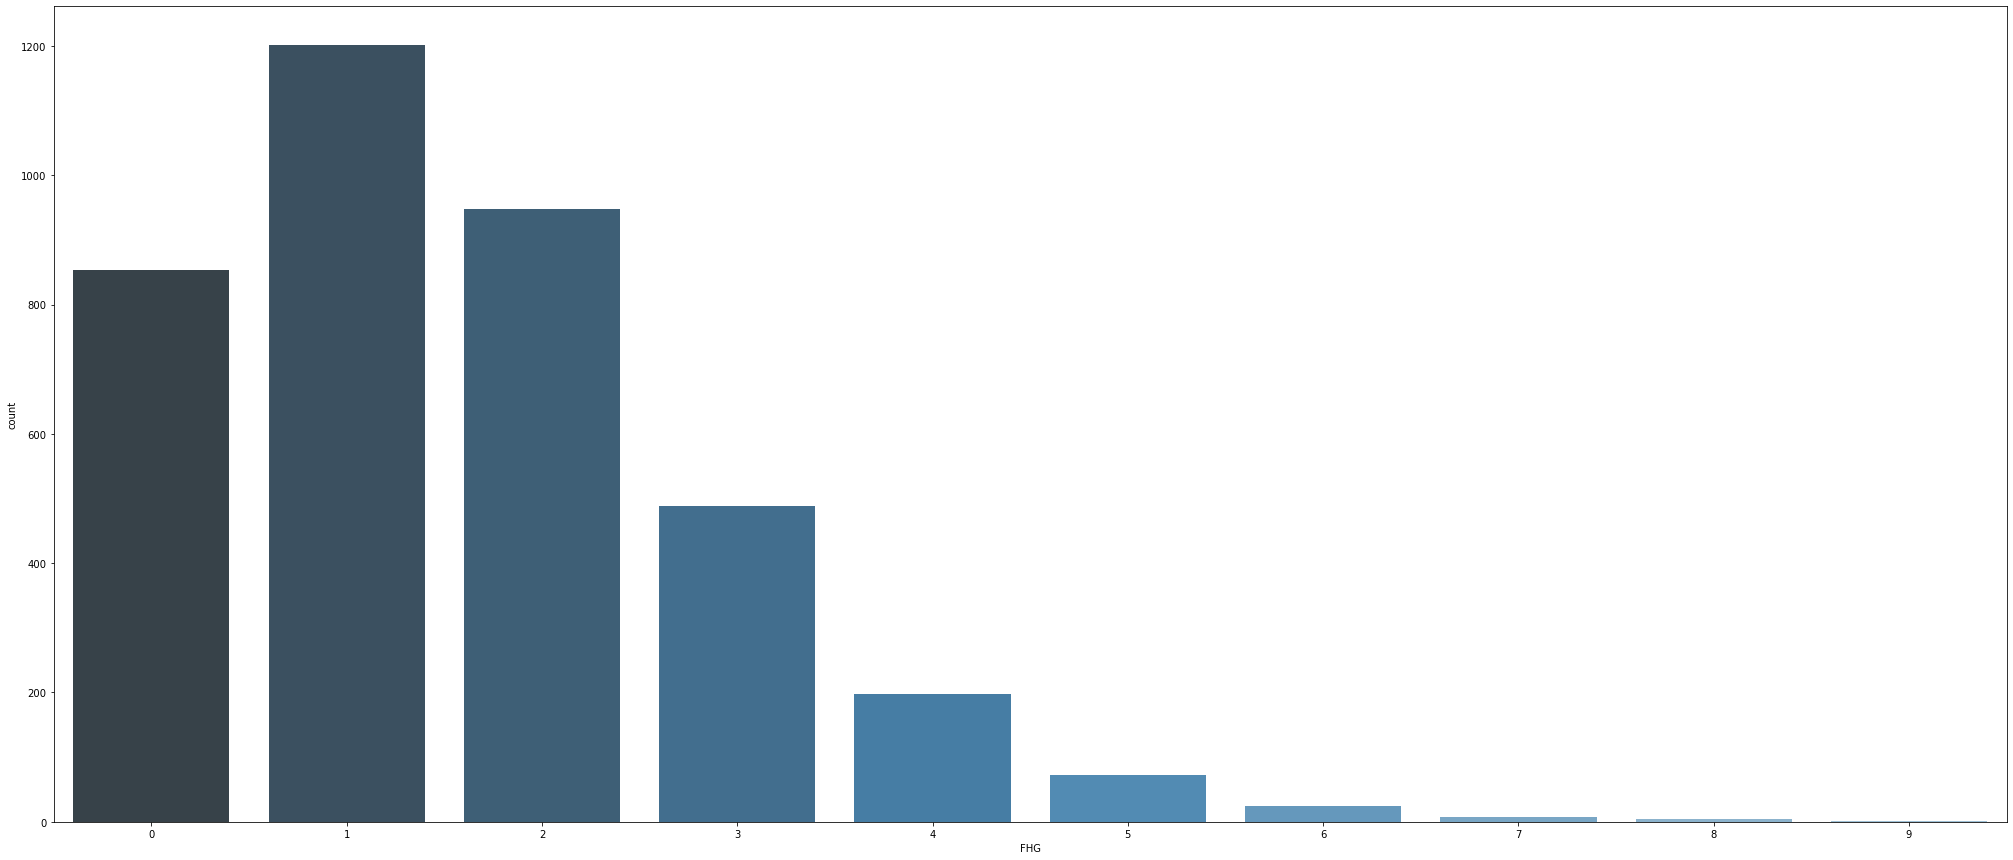

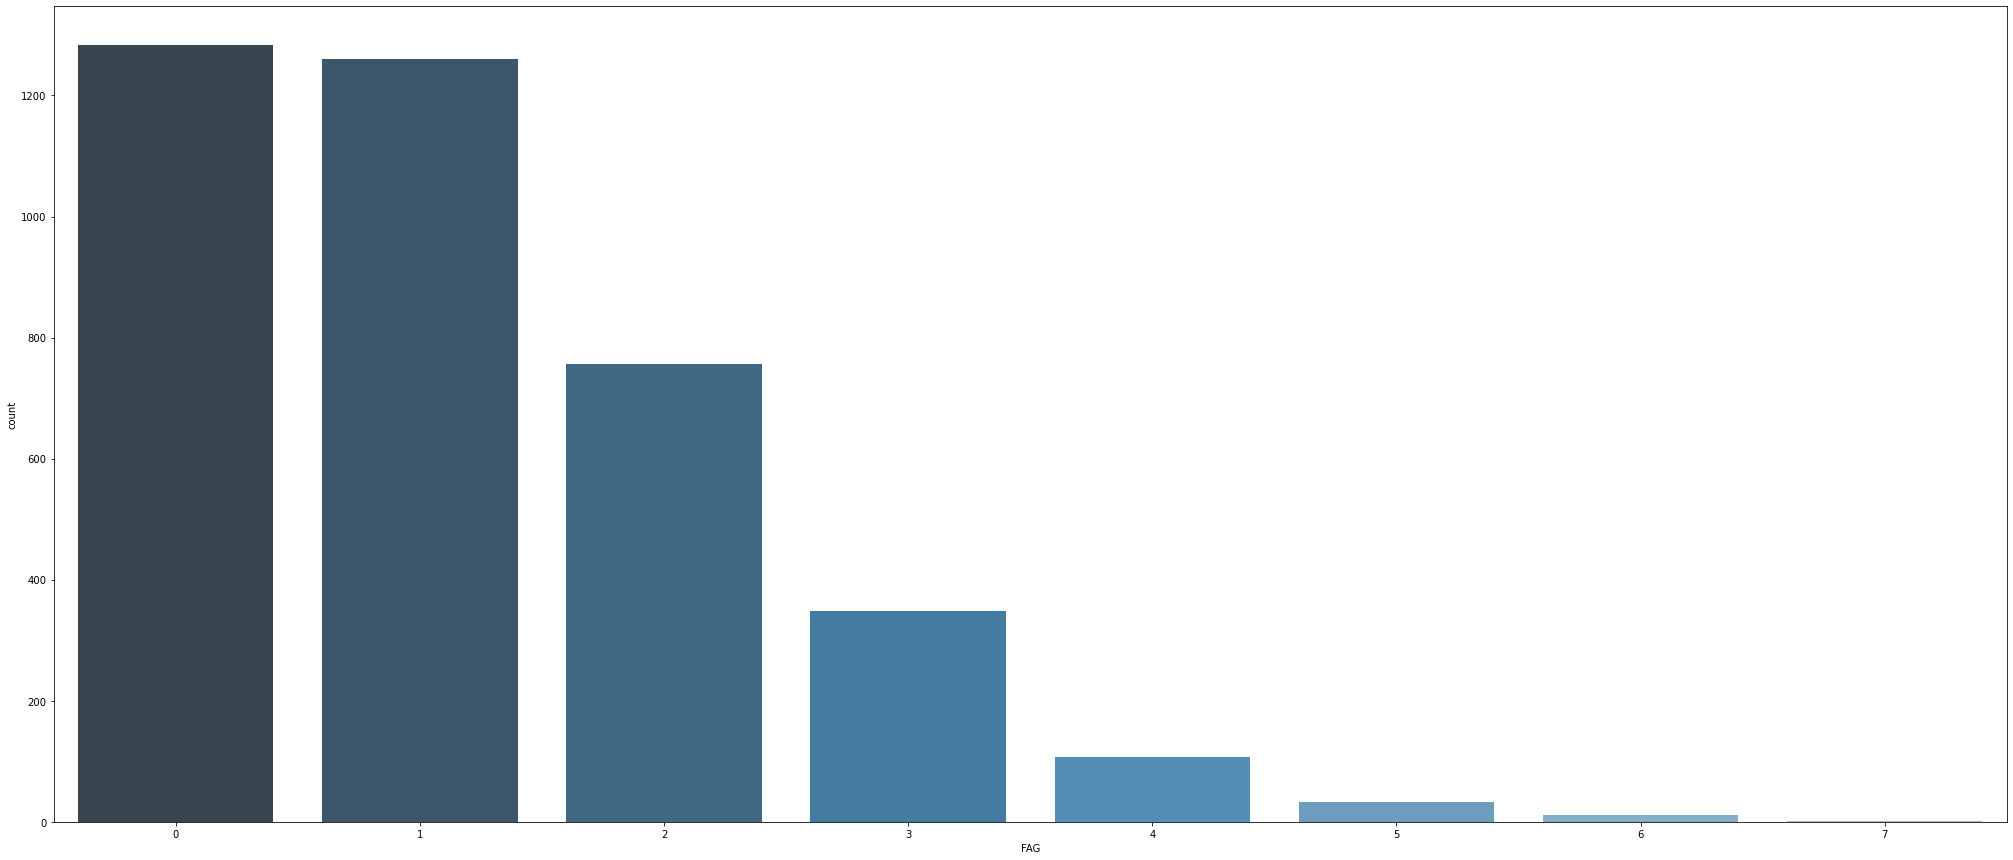

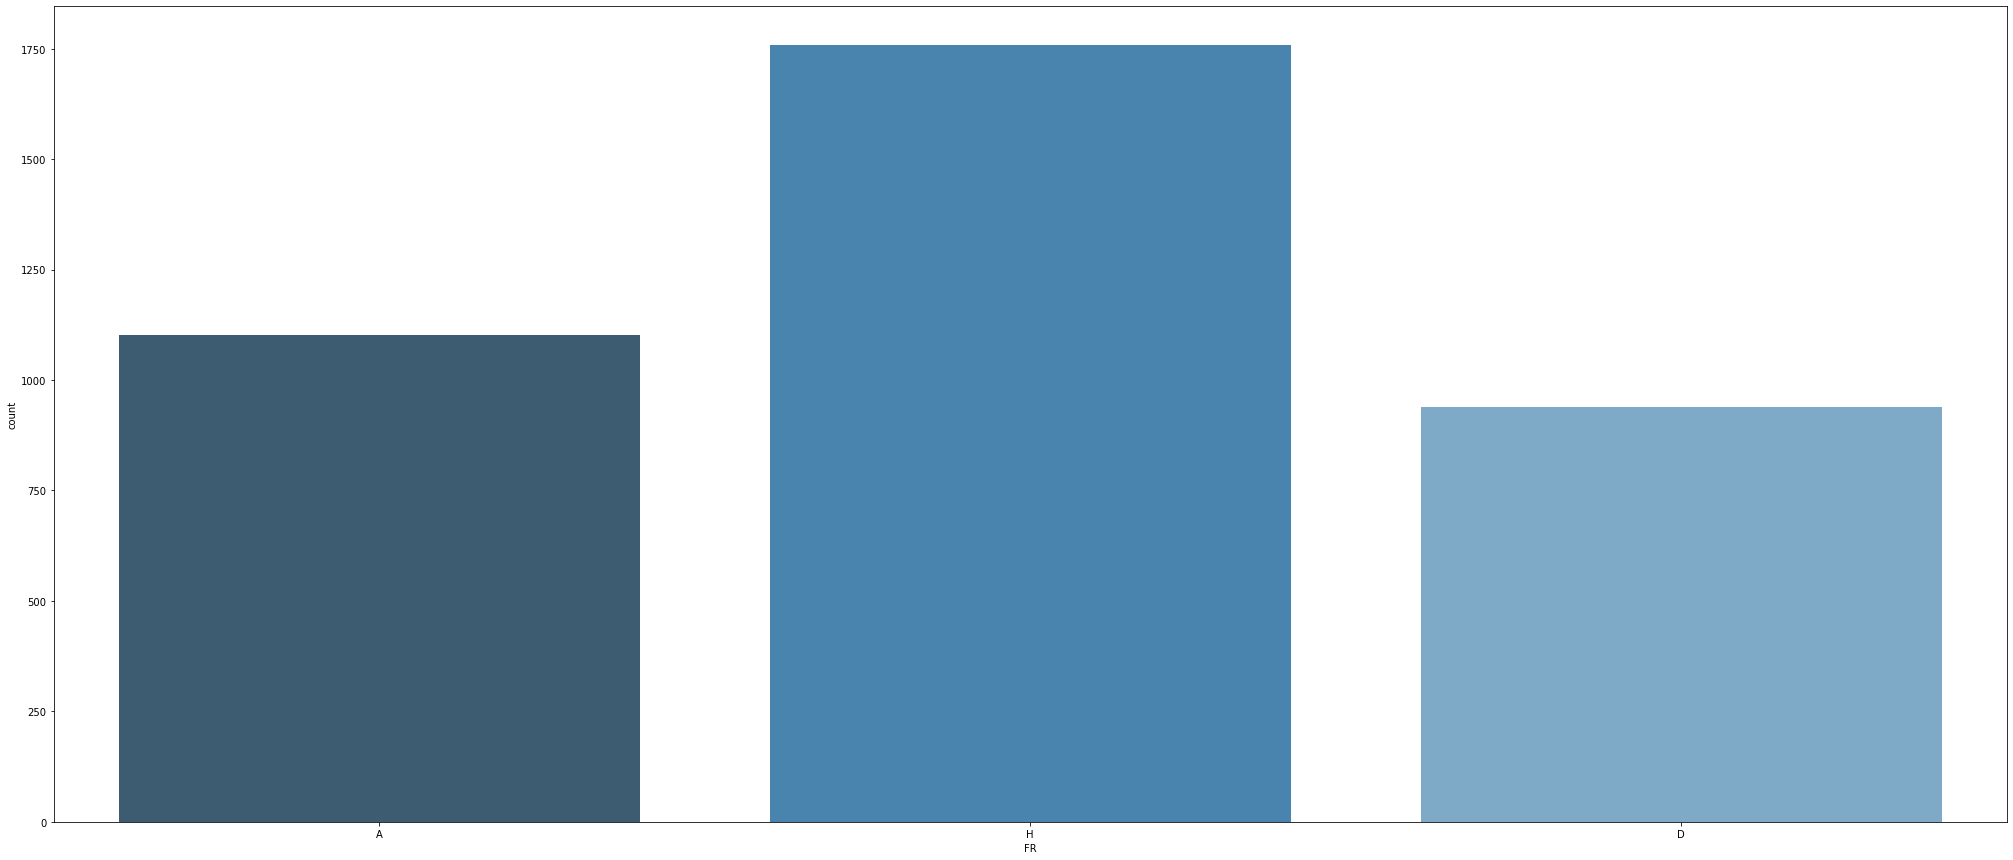

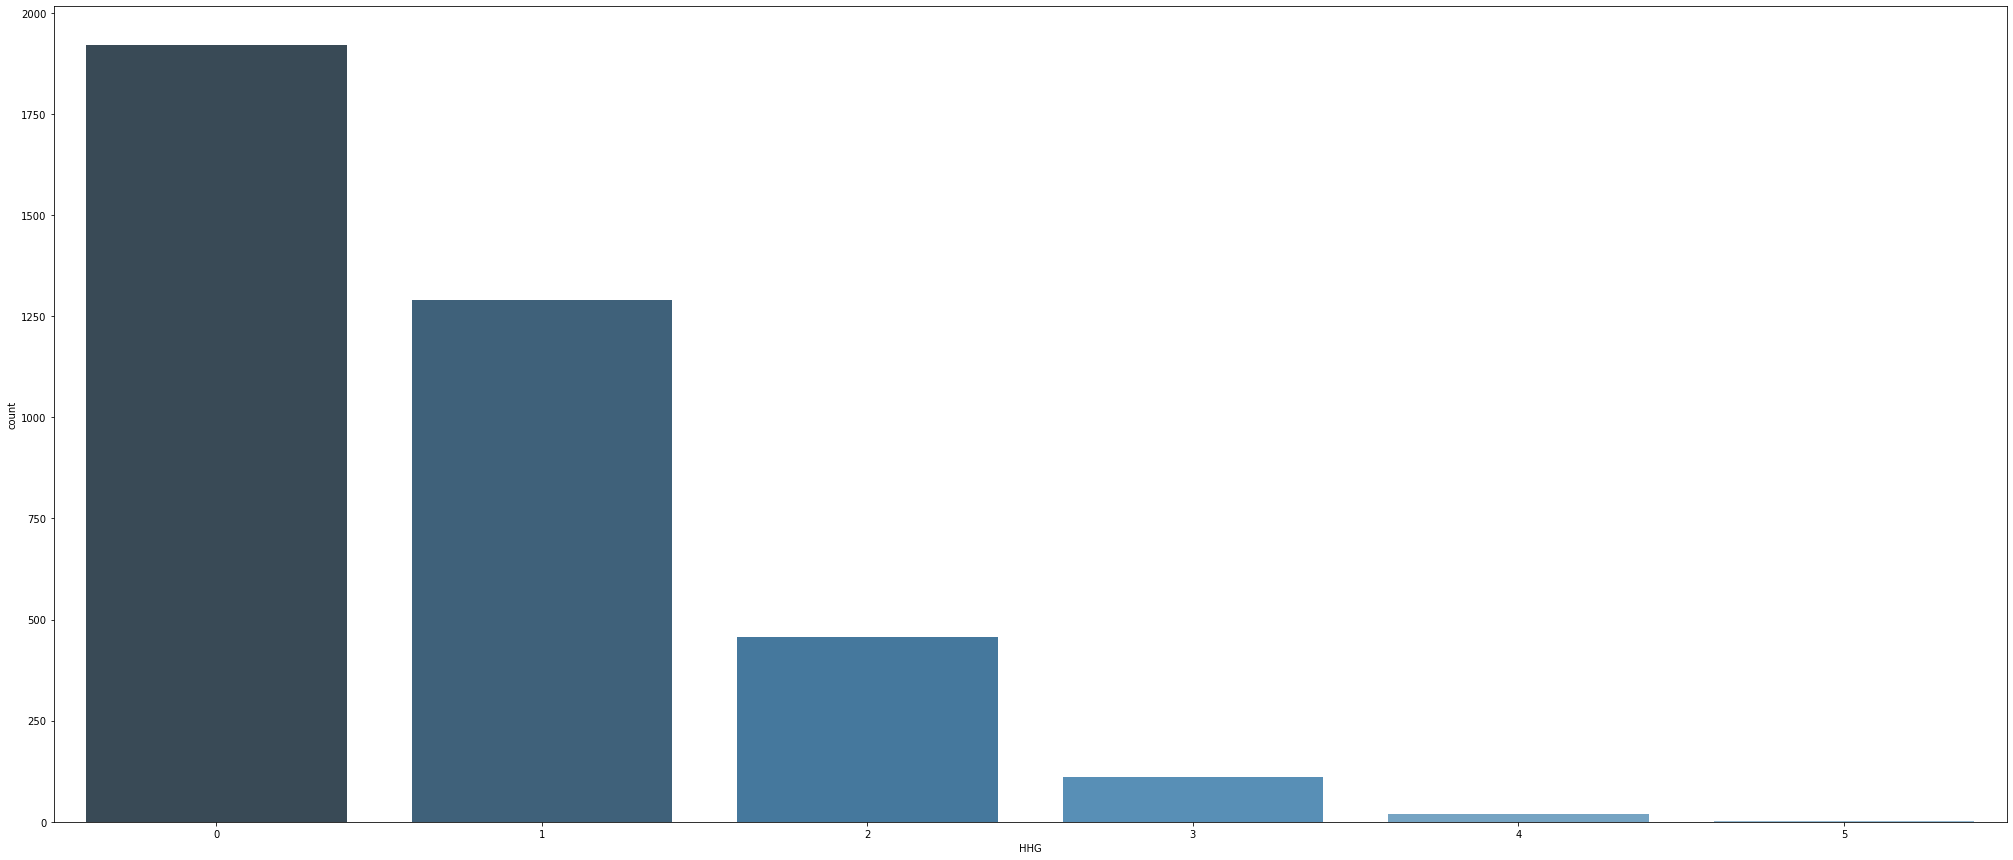

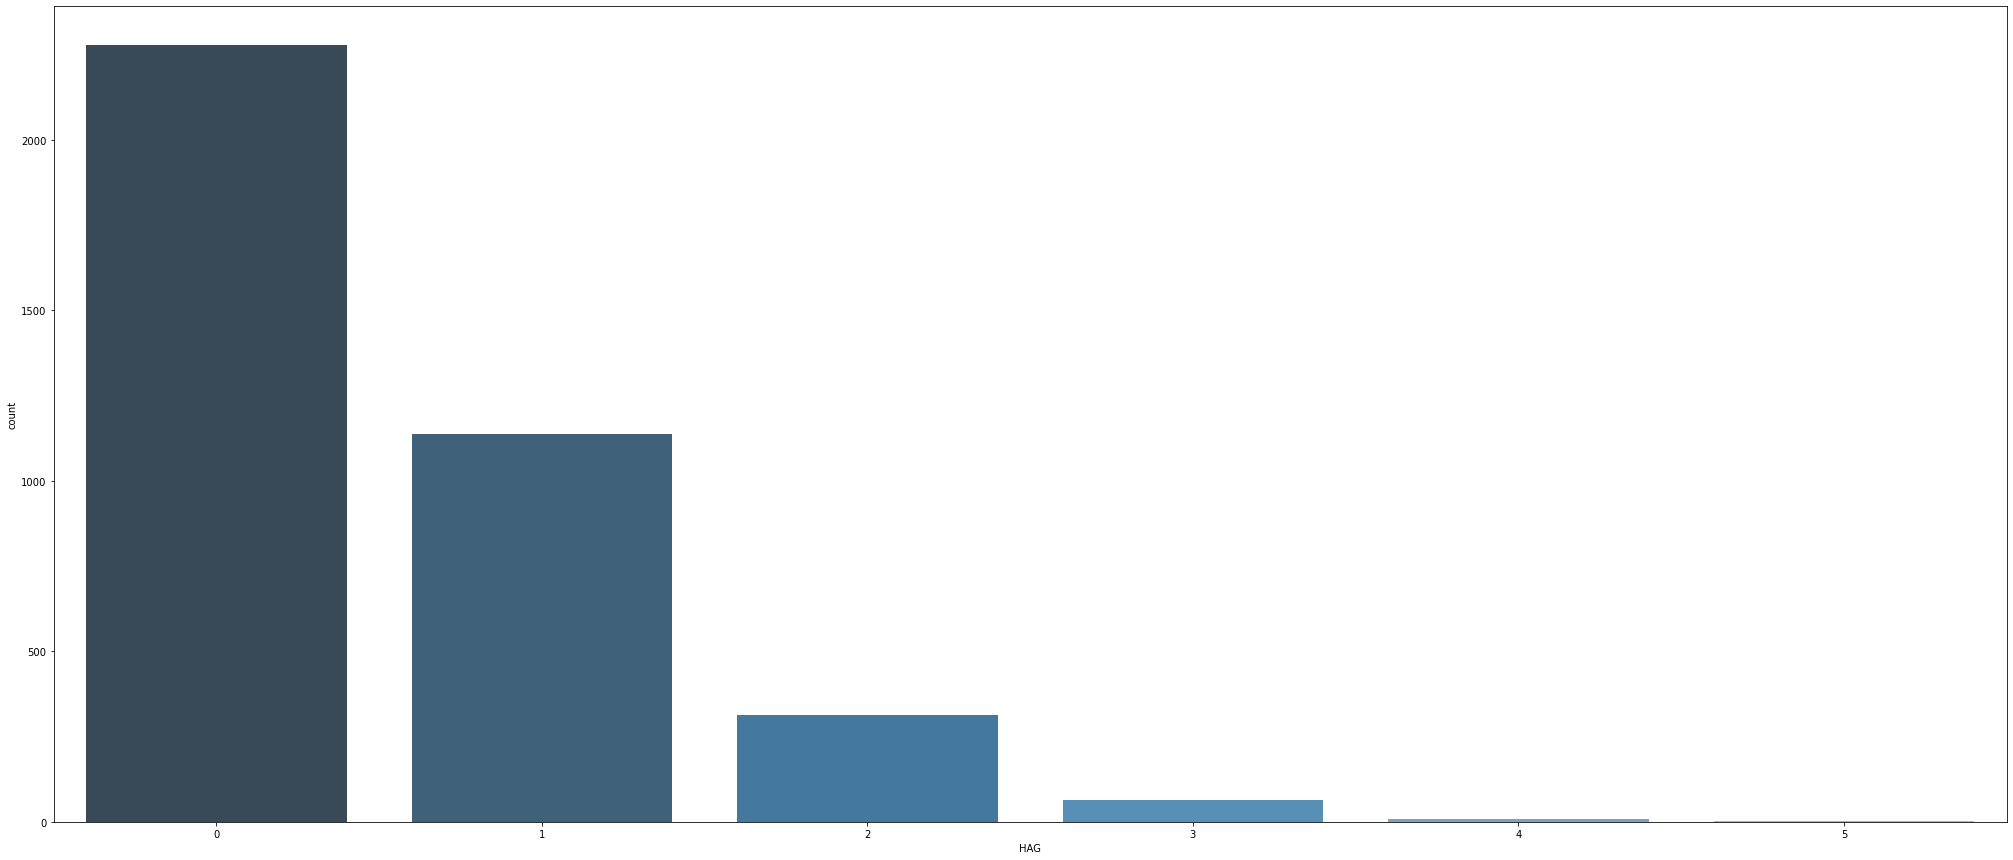

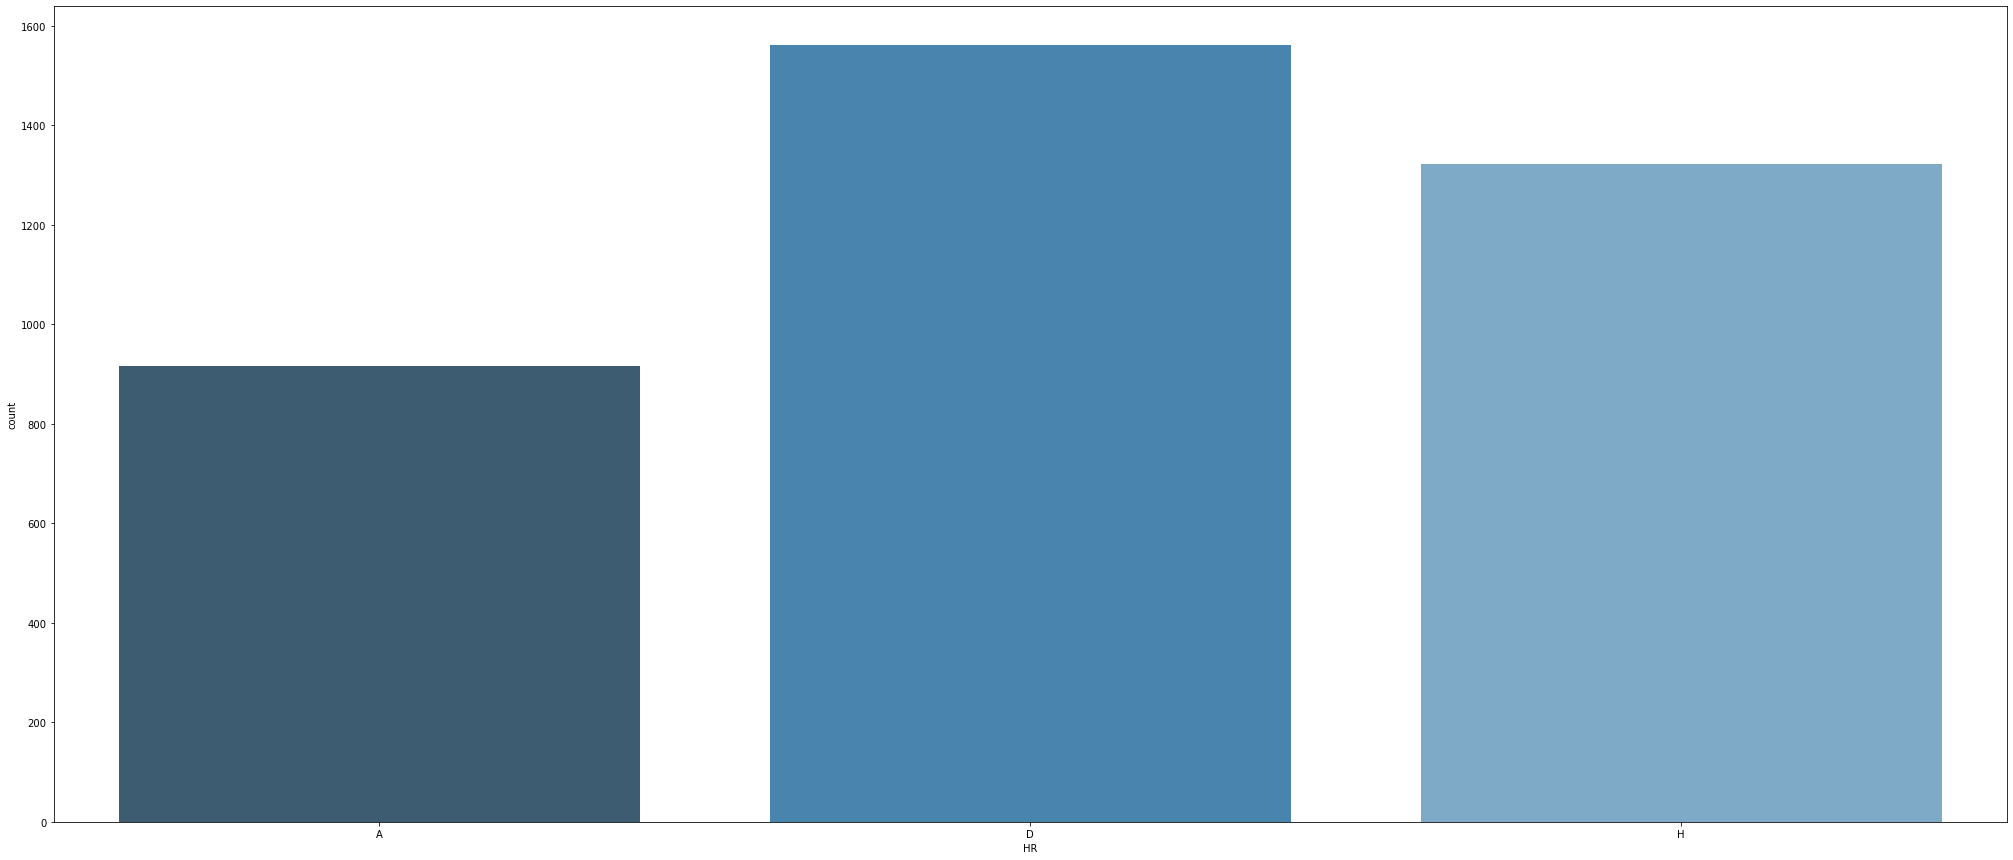

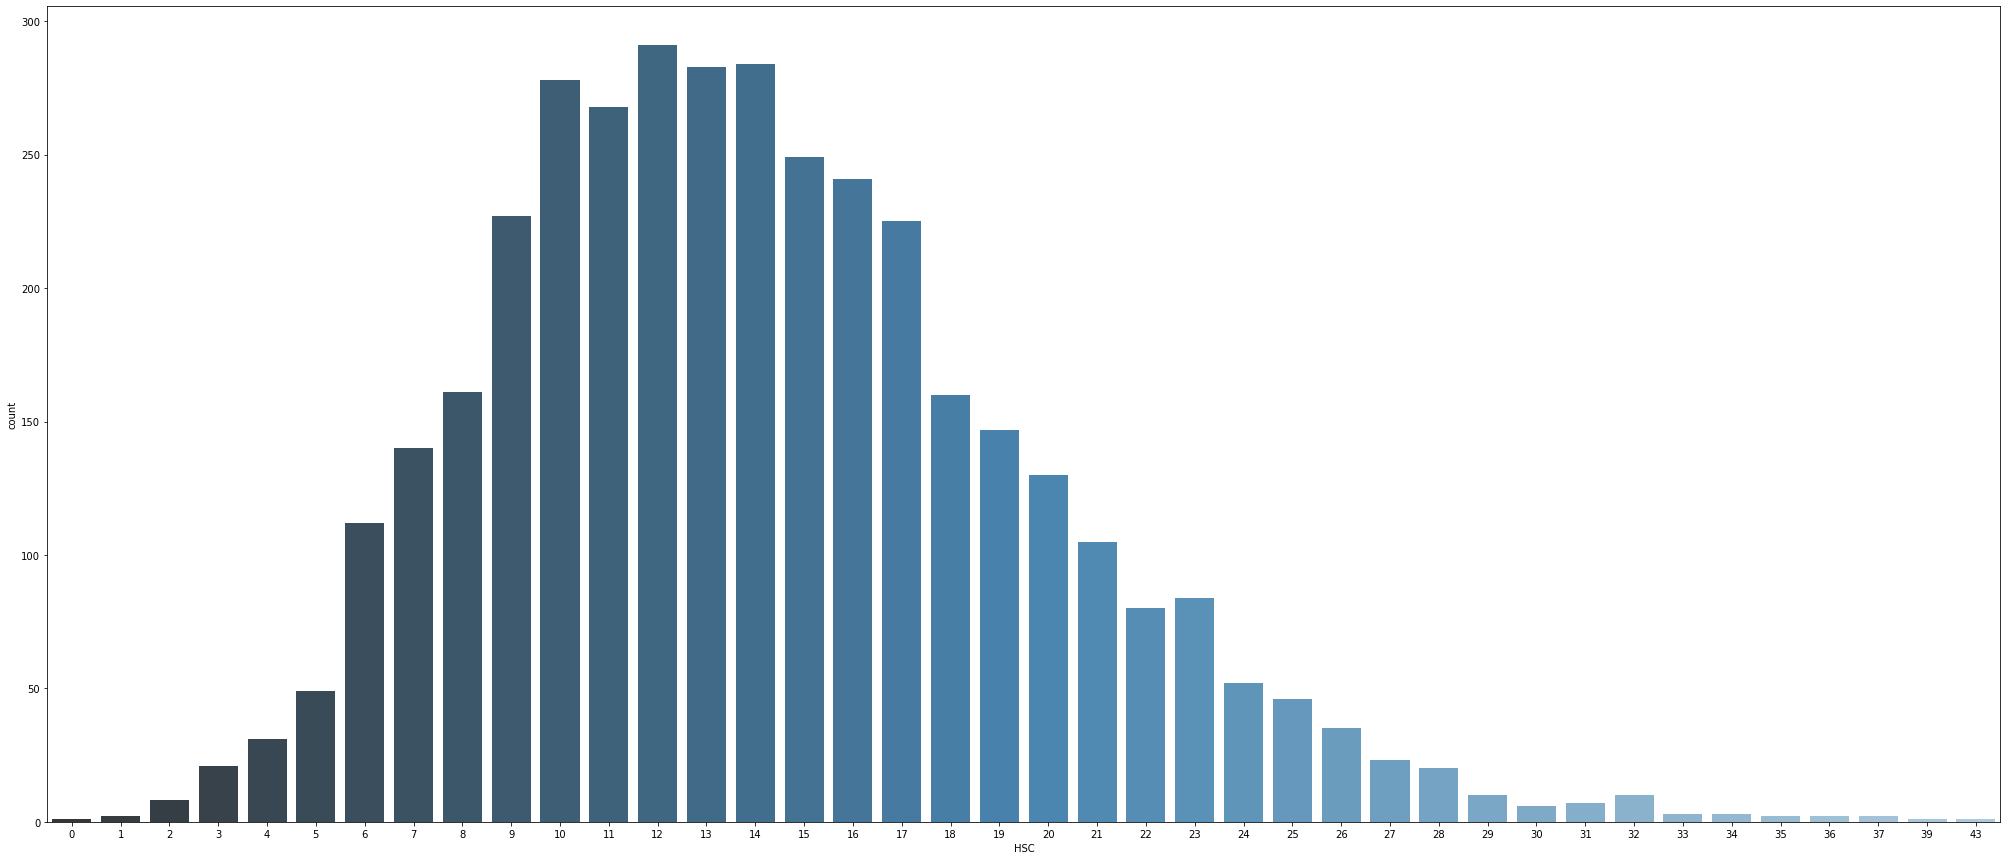

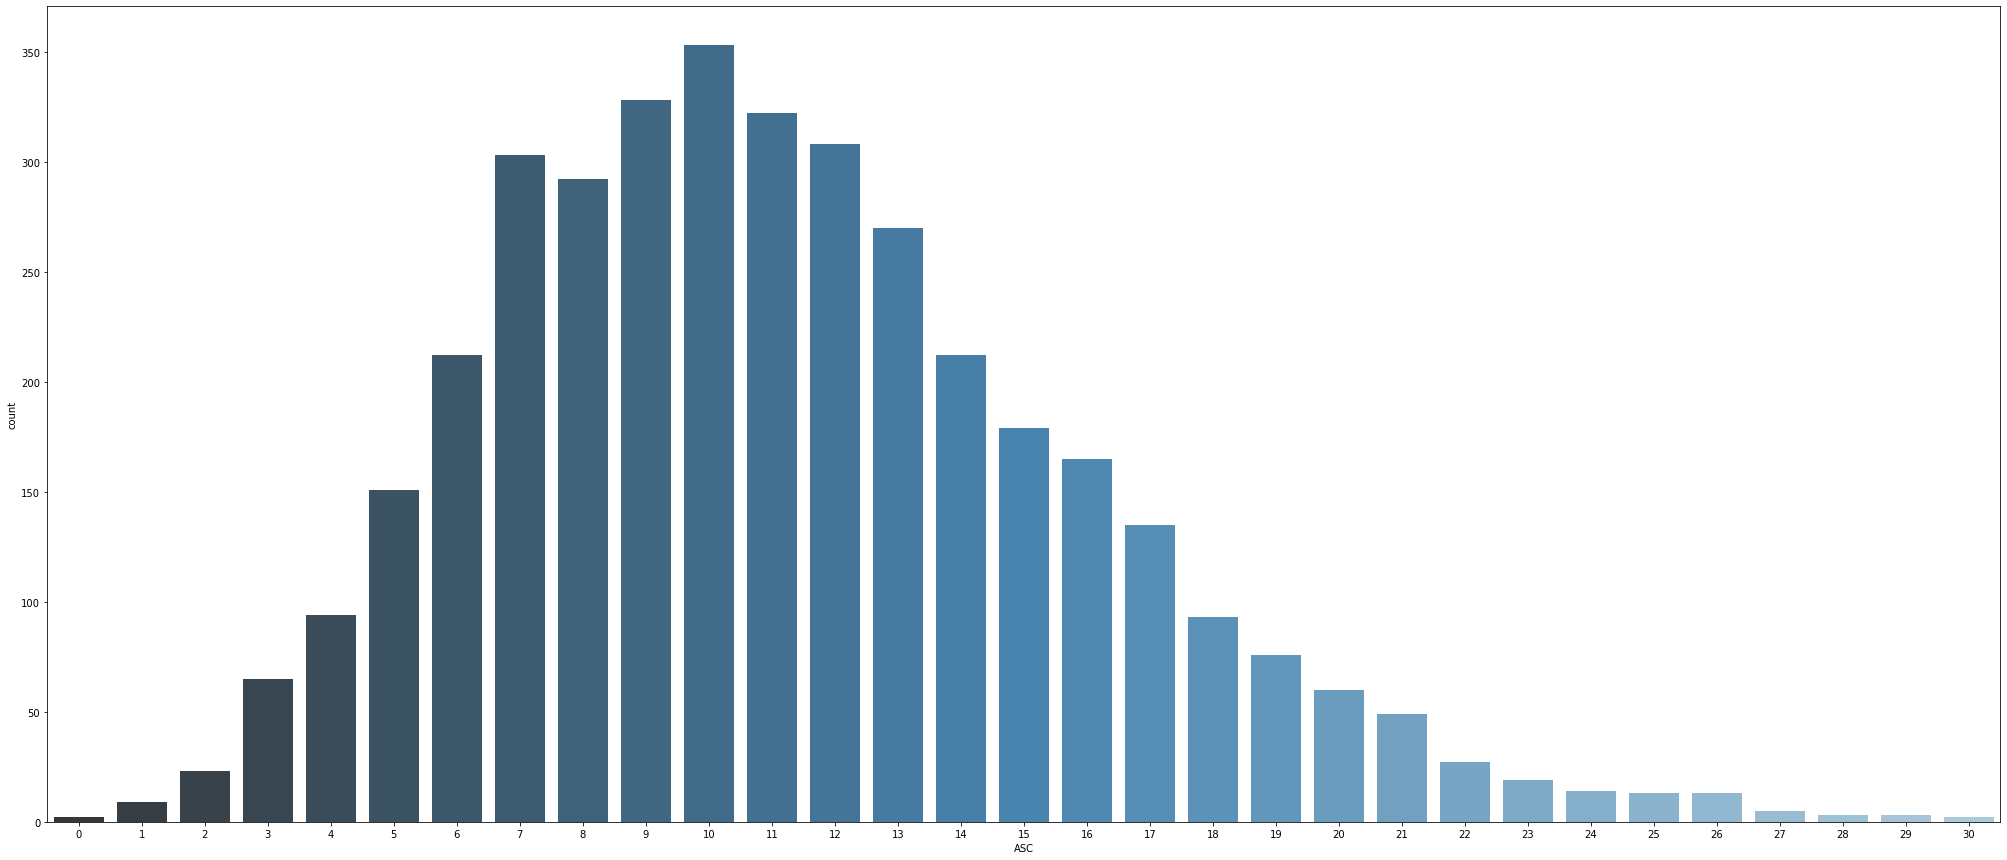

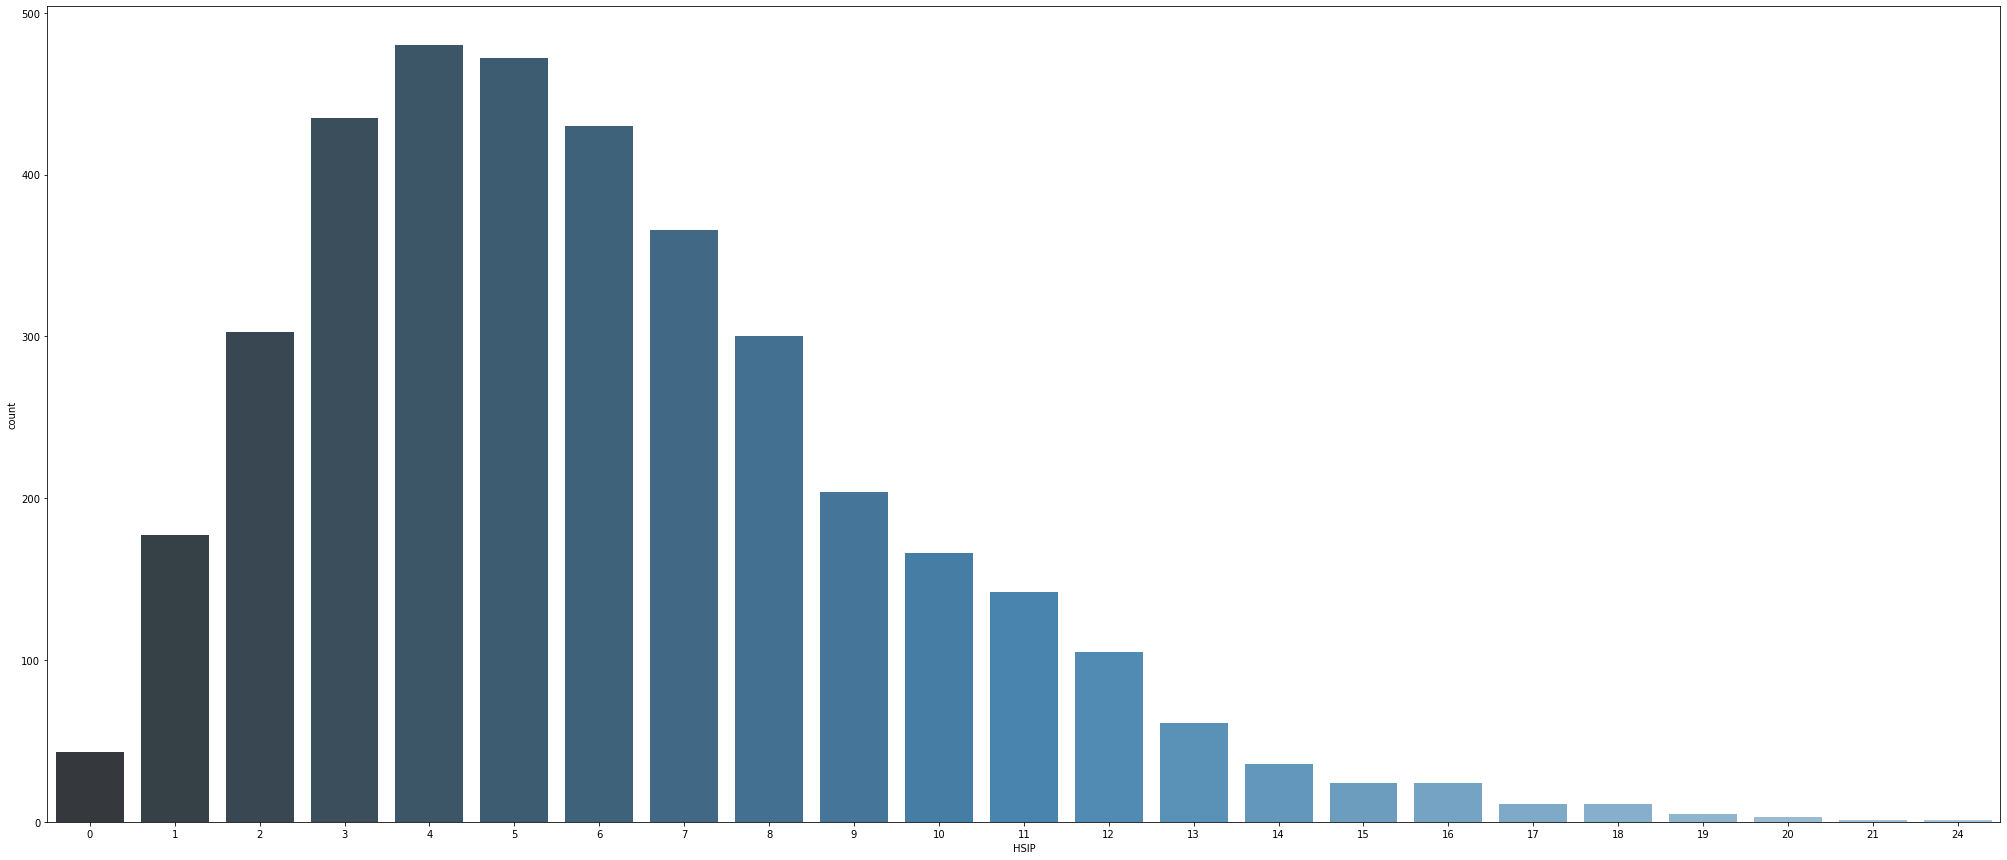

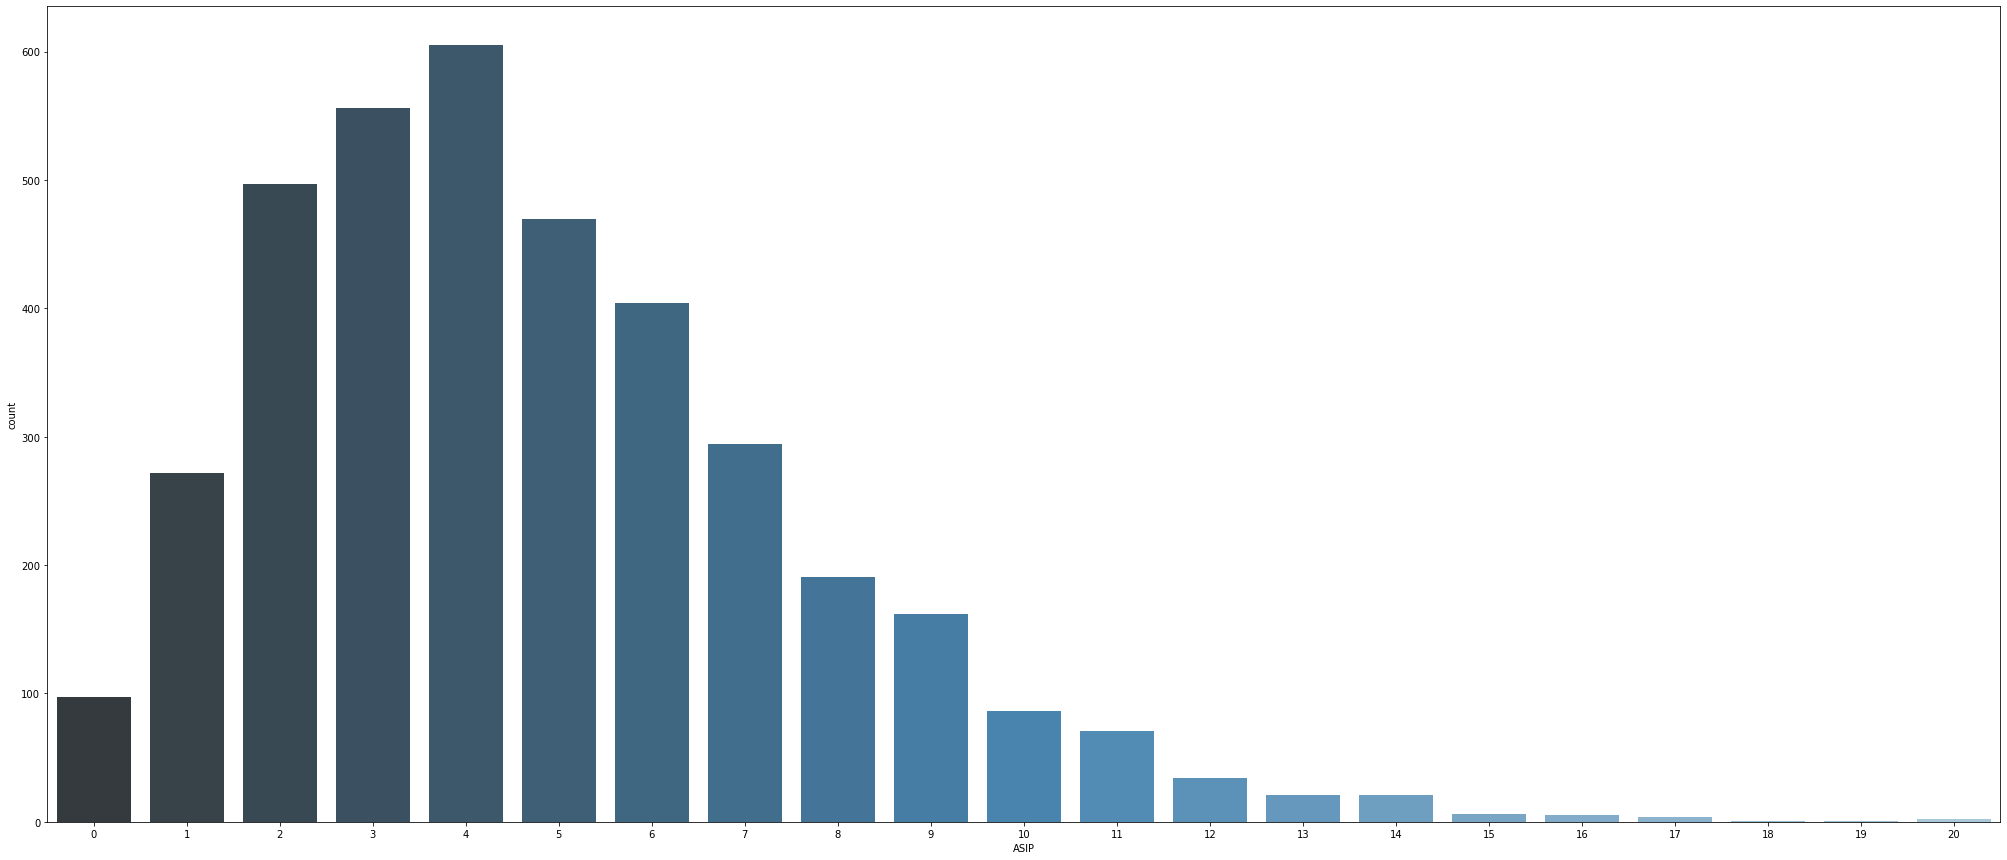

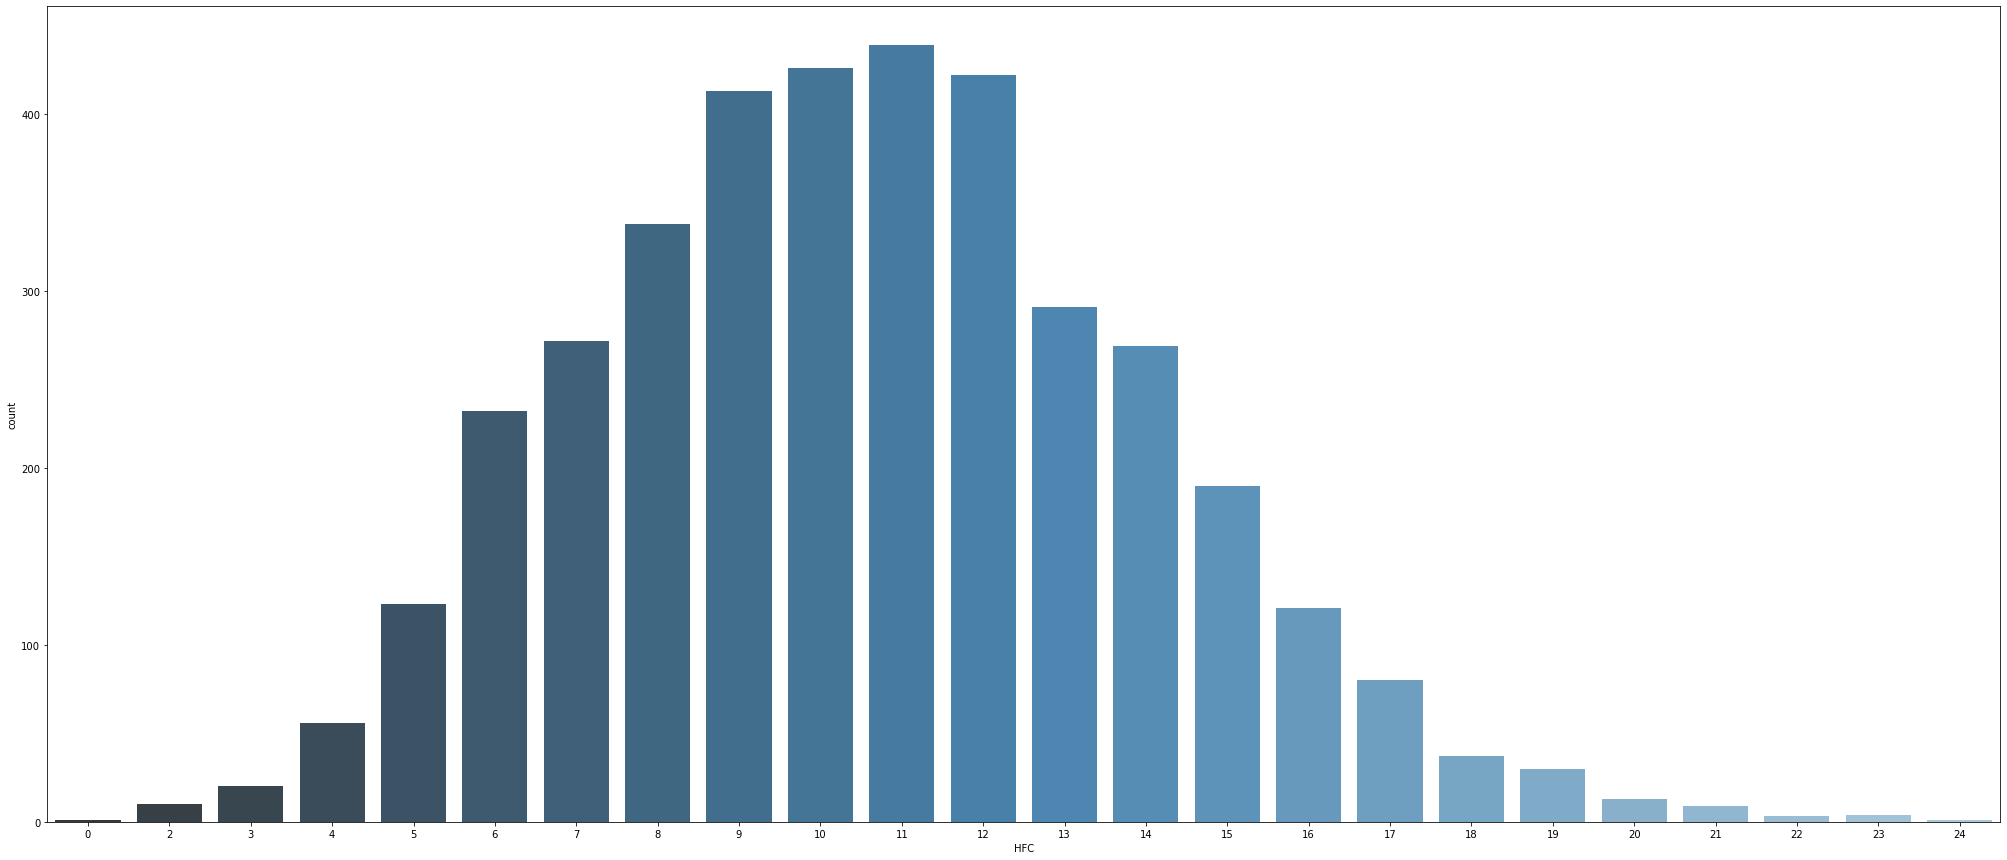

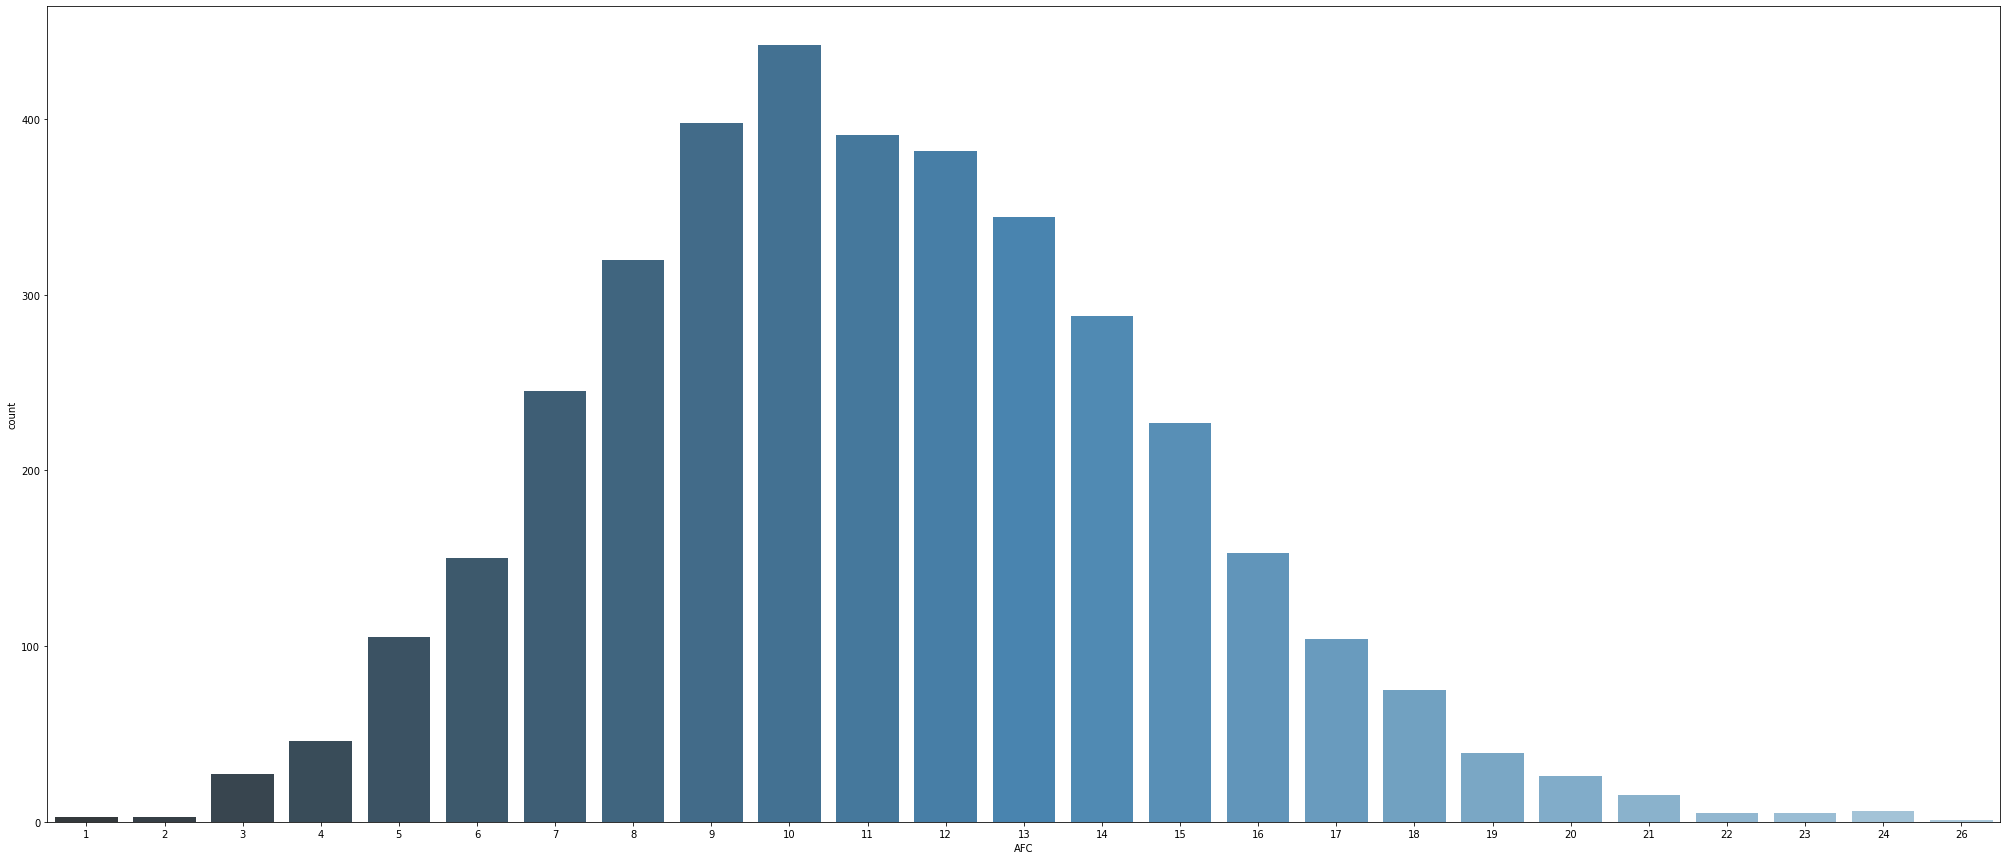

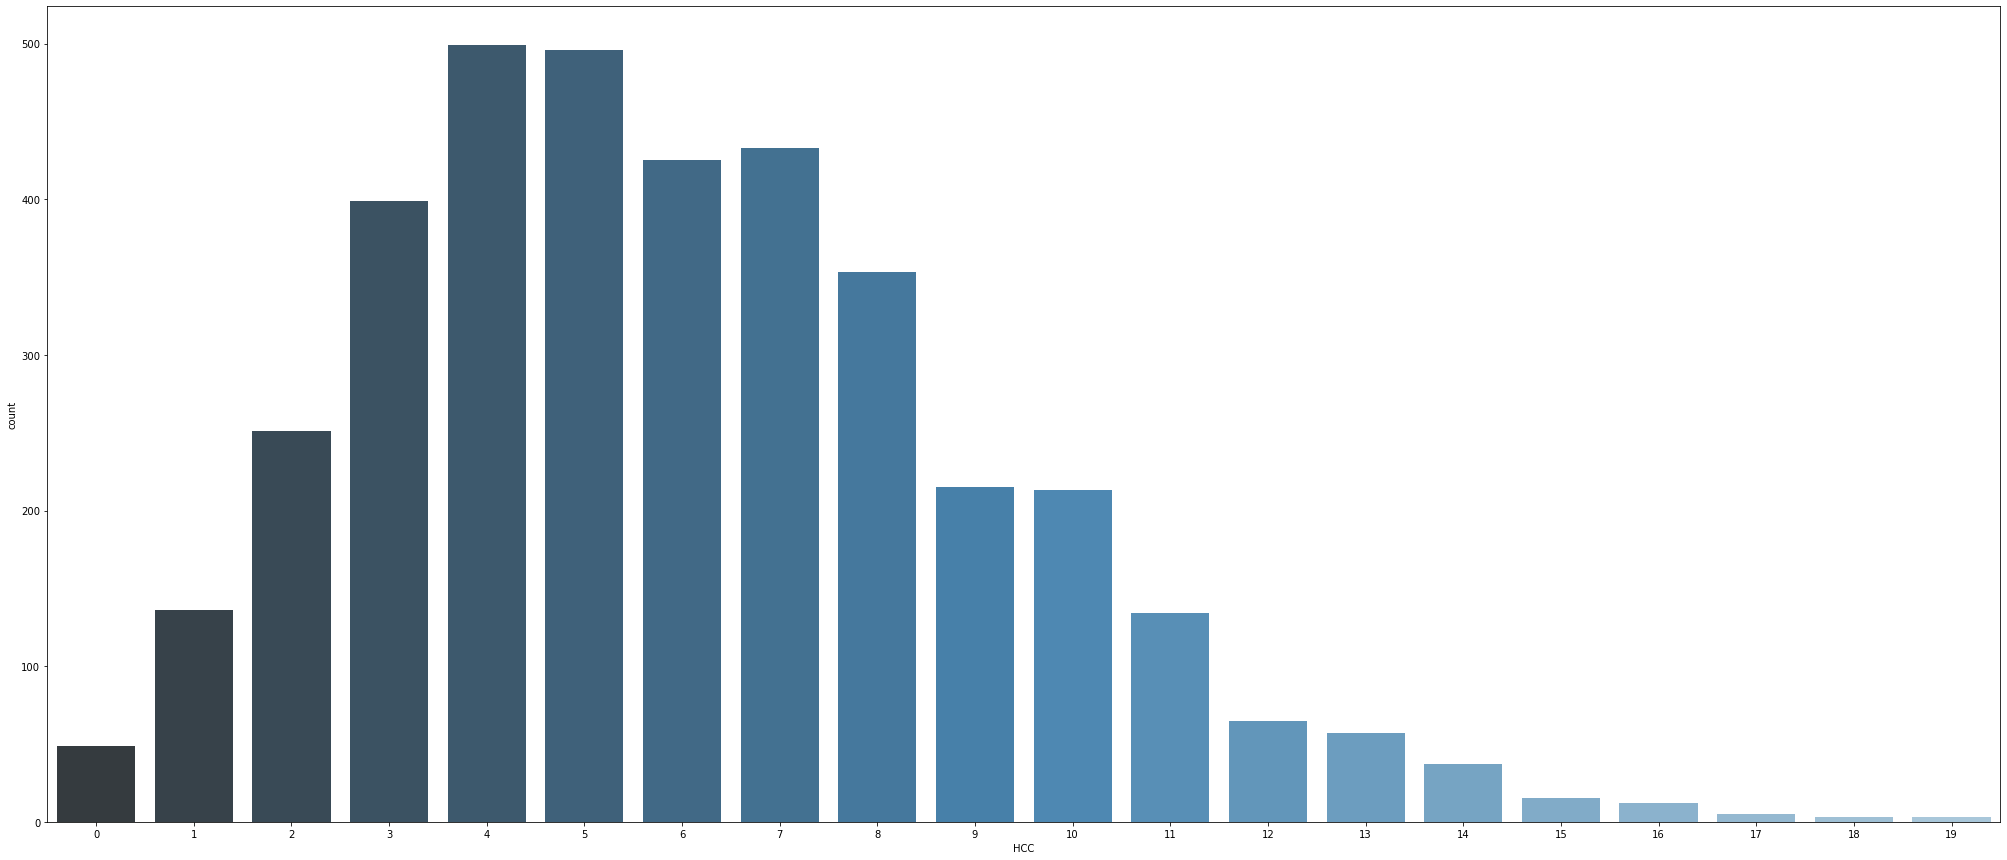

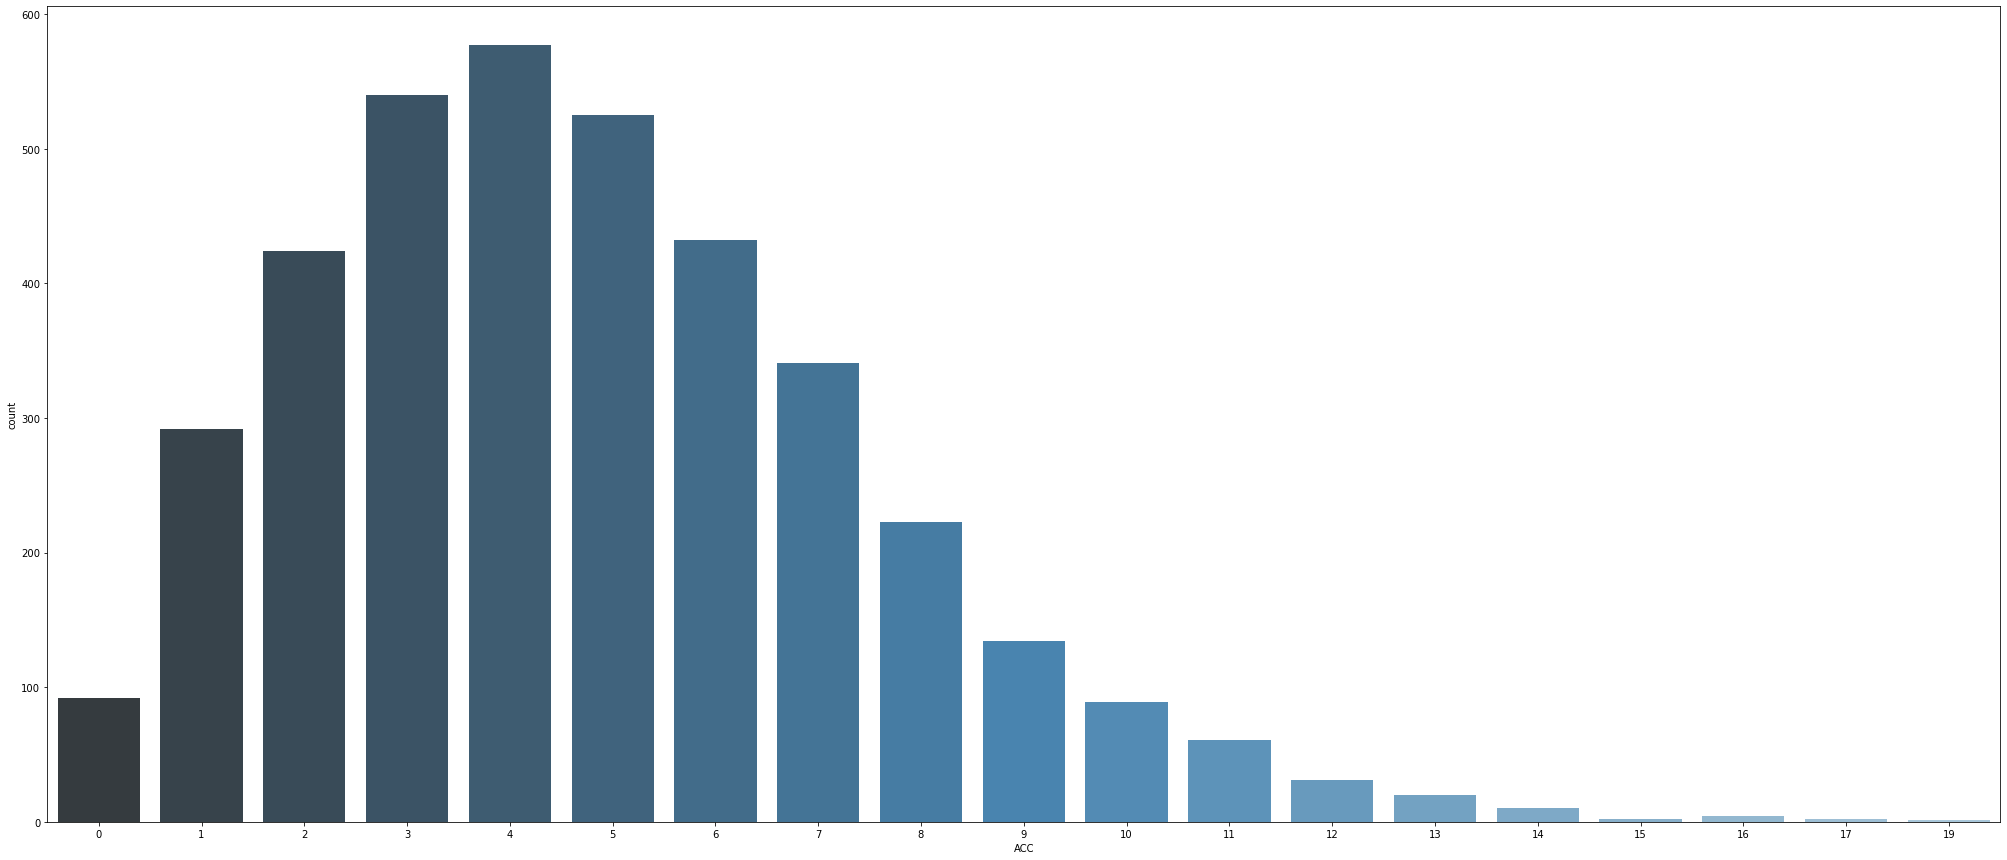

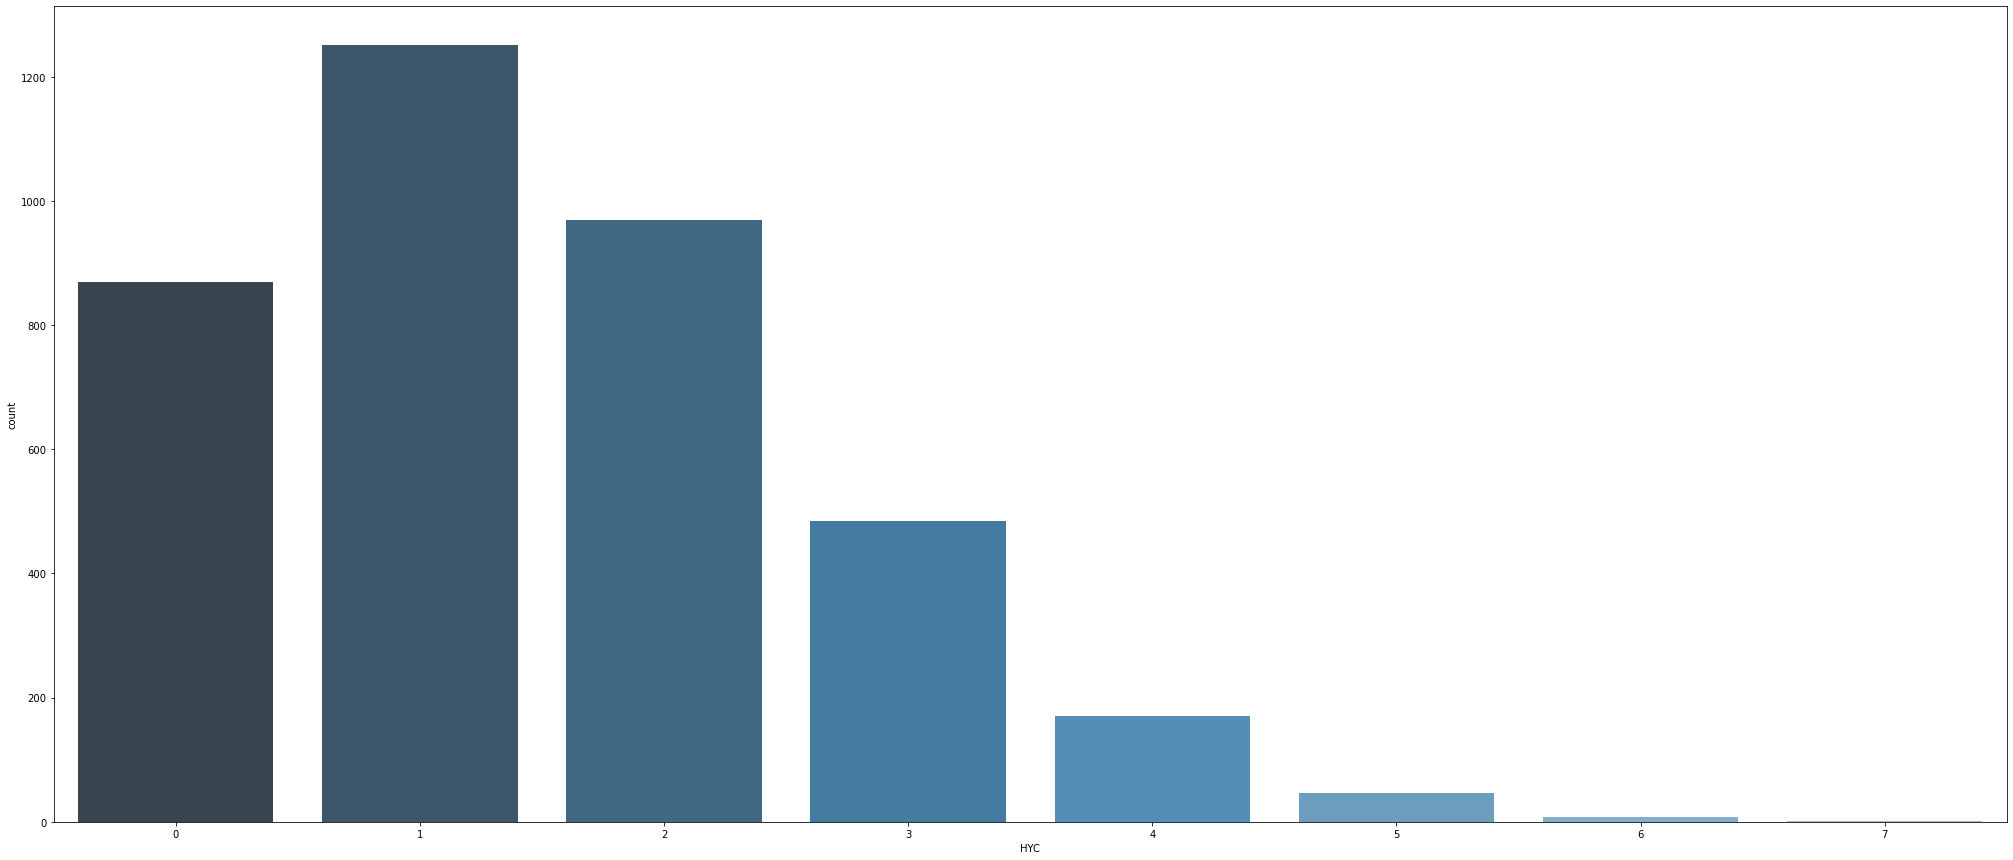

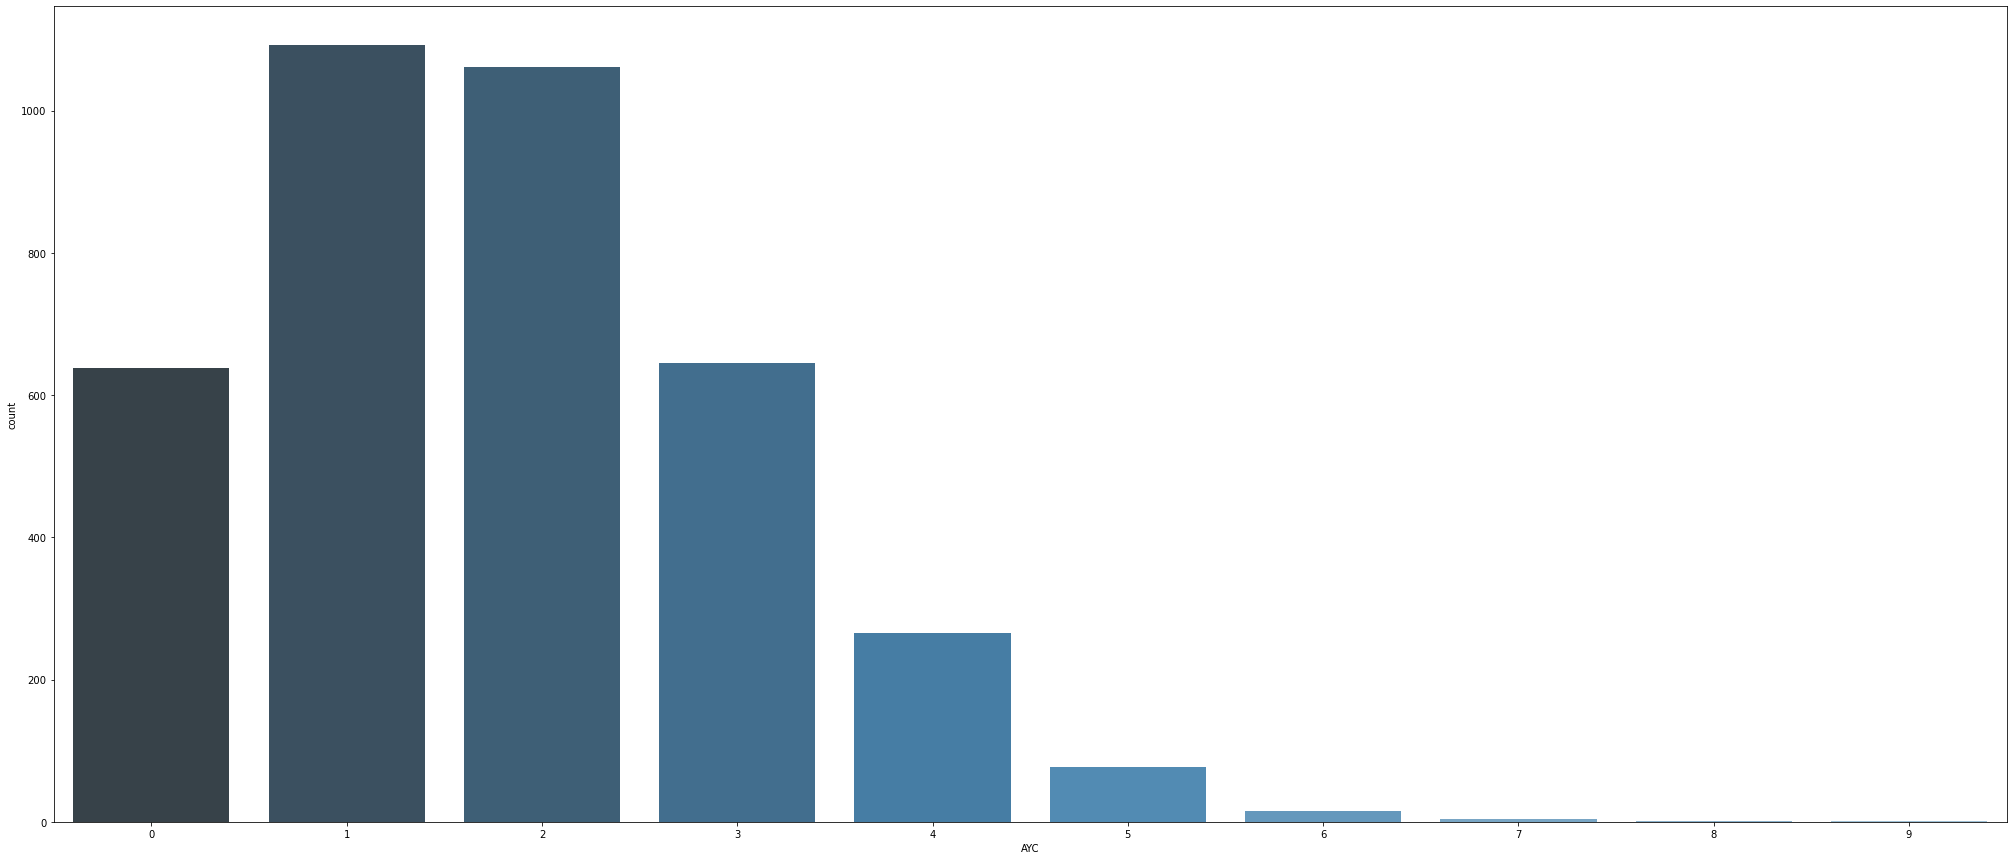

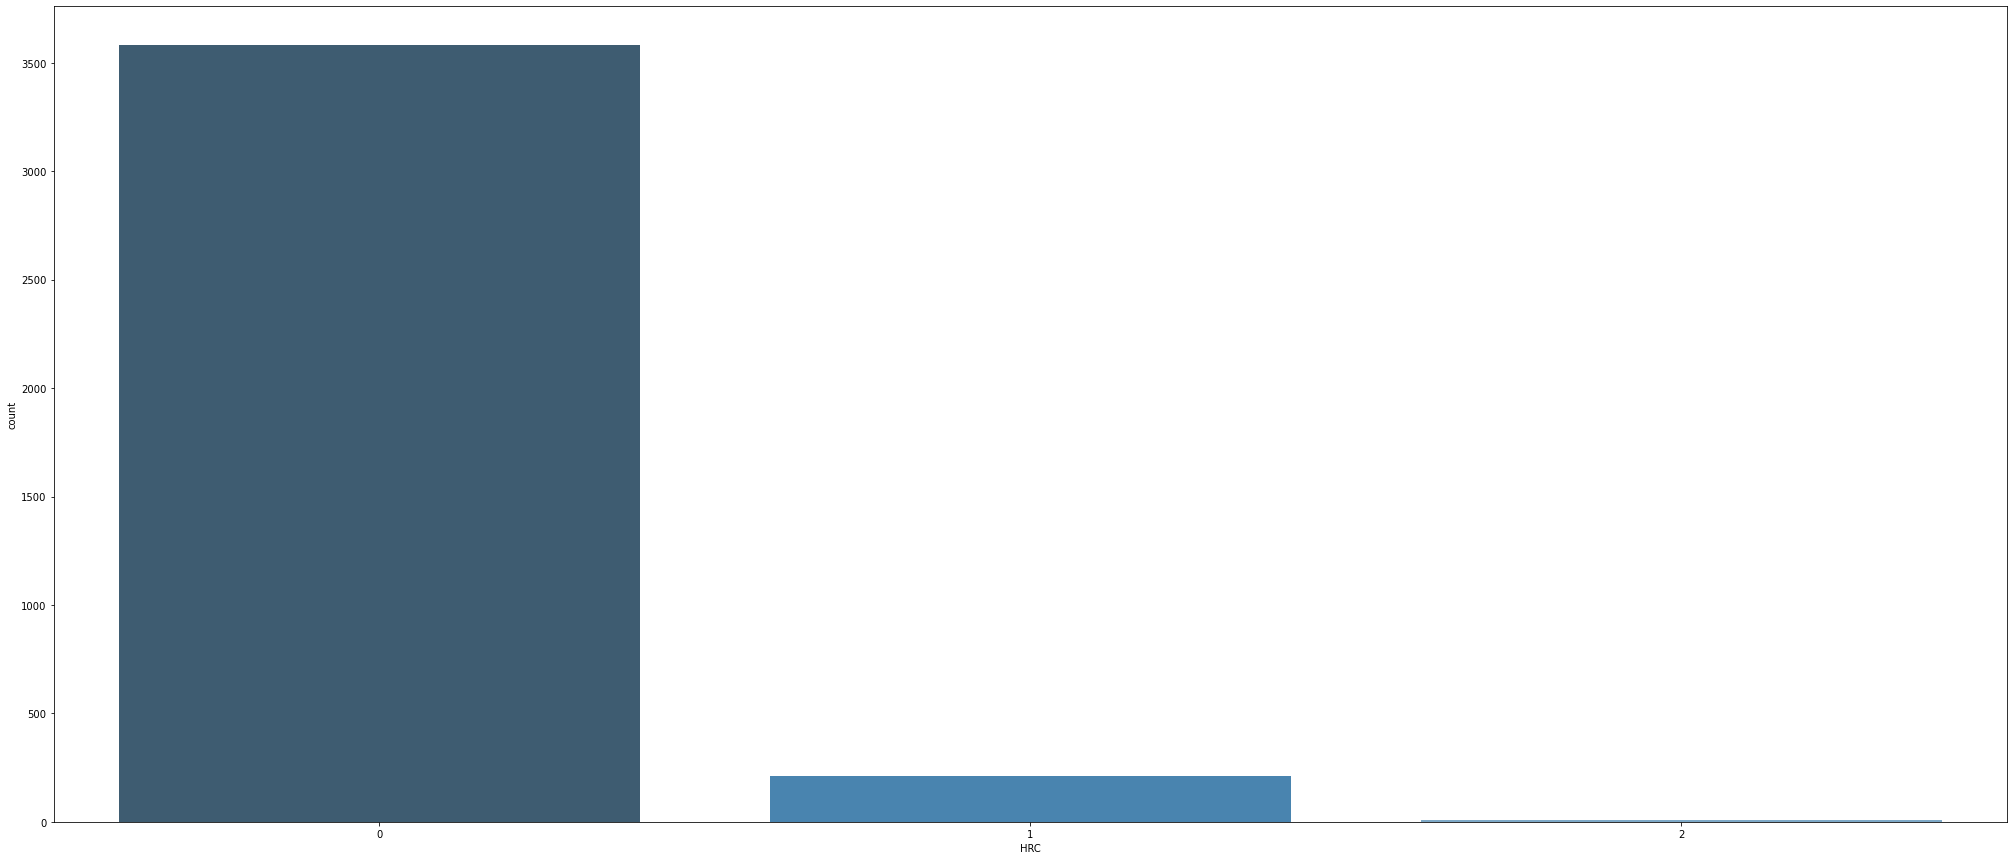

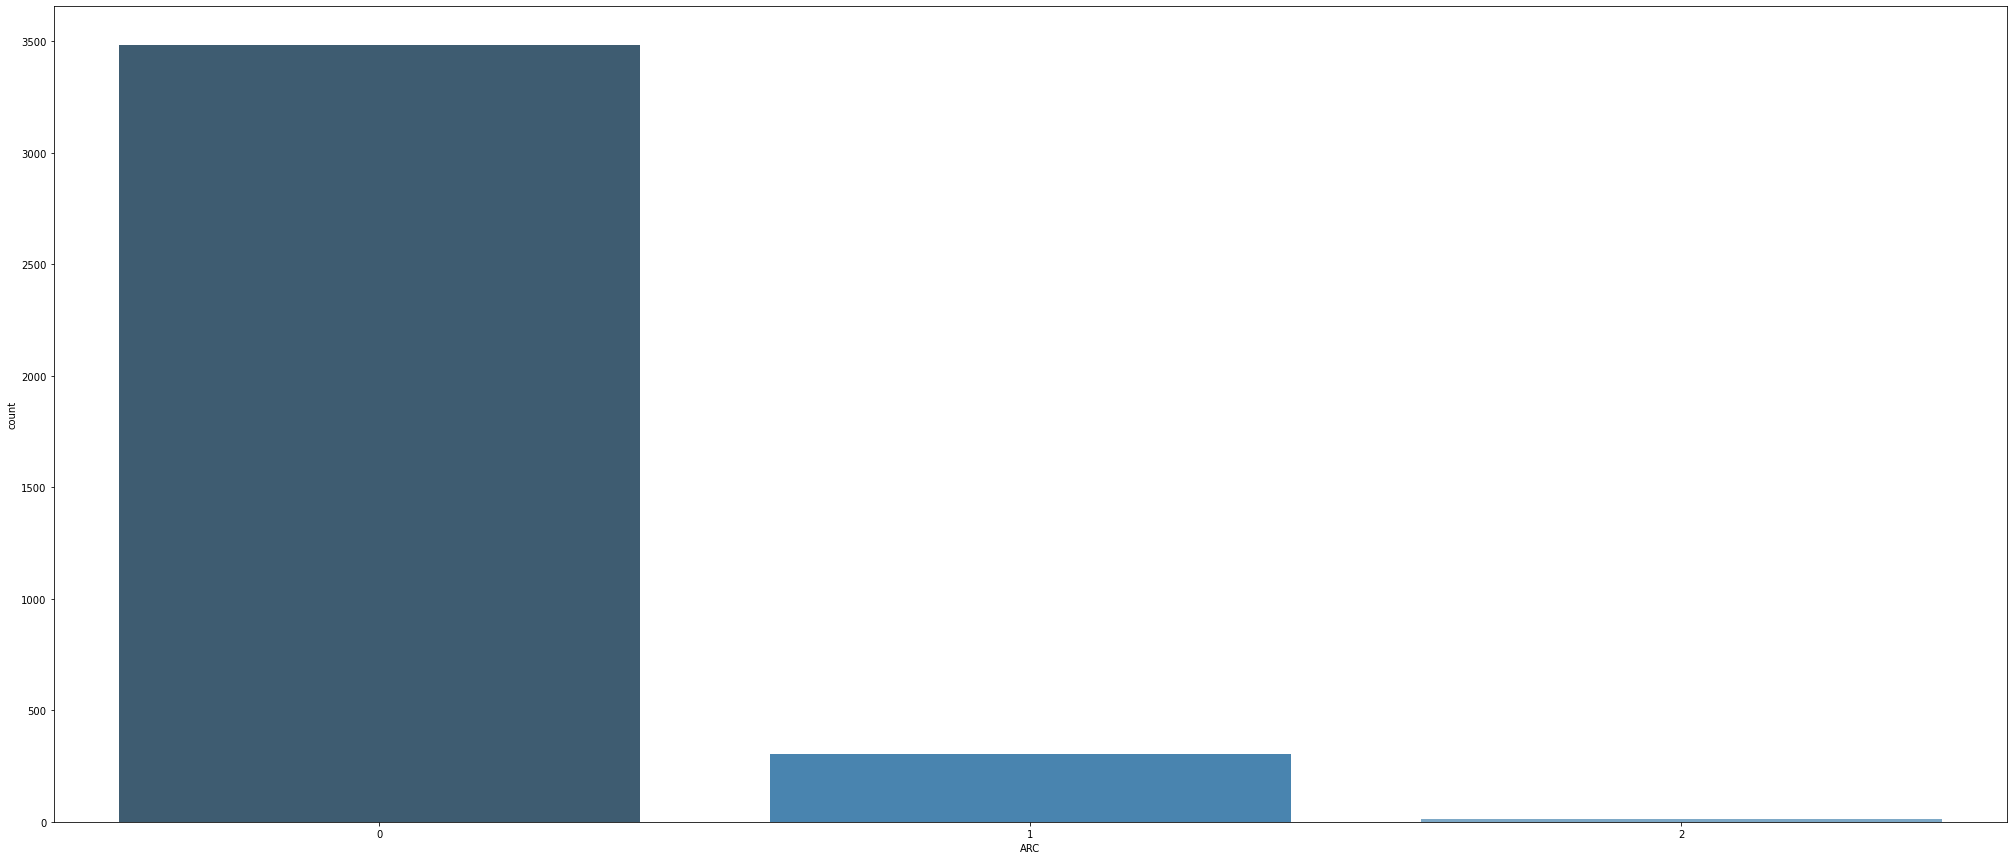

In [10]:
# 각 feature가 어떻게 분포되어 있는지 확인(막대그래프)
col = ['HomeTeam', 'AwayTeam', 'FHG' ,'FAG', 'FR', 'HHG' ,'HAG' ,'HR', 'HSC',
 'ASC', 'HSIP' ,'ASIP', 'HFC' ,'AFC', 'HCC', 'ACC', 'HYC' ,'AYC', 'HRC', 'ARC']
for i in col:
    plt.figure(figsize=(35,15))
    sns.countplot(x=i, data=EPL_df,palette='Blues_d')
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

> 5. 막대 그래프

1. 득점기록 (FTHG, FTAG)

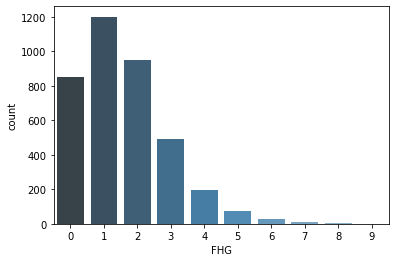

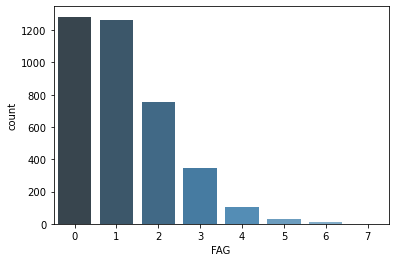

In [11]:
# 득점기록 막대그래프로 표현하기

col = [ 'FHG' ,'FAG']

for i in col:
    sns.countplot(x=i, data=EPL_df,palette='Blues_d')
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀이 어웨이 팀보다 더 많은 득점을 기록한다.

2. 경고 기록 (HY, AY)

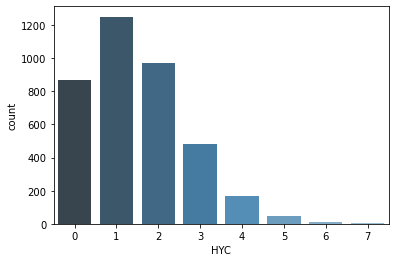

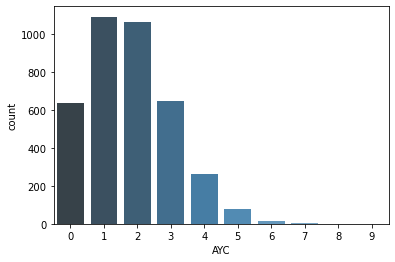

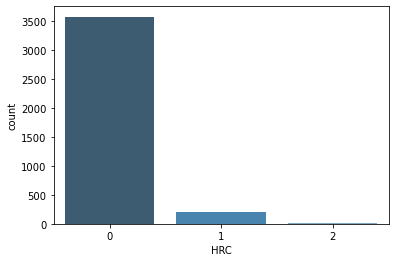

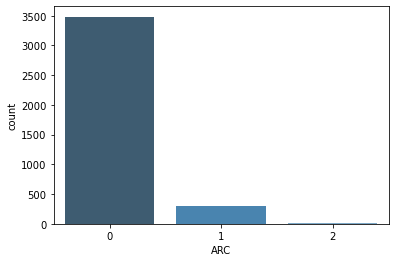

In [12]:
# 경고 기록  막대그래프로 표현하기
col = [ 'HYC' ,'AYC', 'HRC', 'ARC']
for i in col:
    sns.countplot(x=i, data=EPL_df,palette='Blues_d')
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀보다 어웨이 팀이 더 많은 경고를 받는다

3. 경기 결과 (FTR)

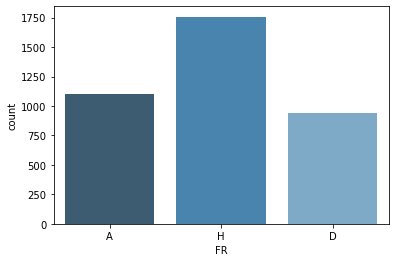

In [13]:
 #경기 결과 막대그래프로 표현하기
col = [ 'FR']
for i in col:
    sns.countplot(x=i, data=EPL_df,palette='Blues_d')
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀의 승리하는 비율이 더 높다

> 6. 히스토그램

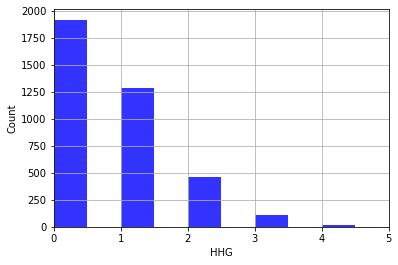

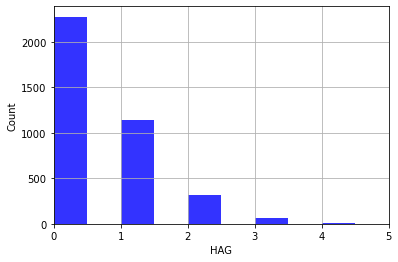

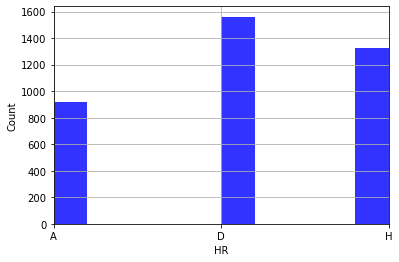

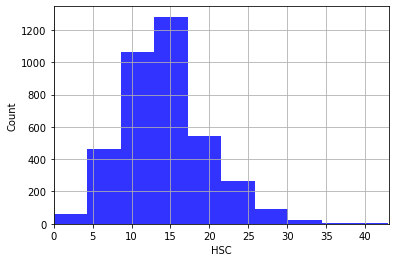

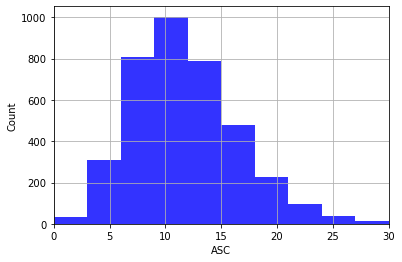

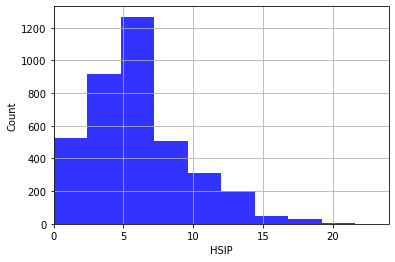

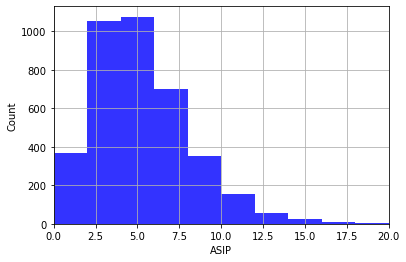

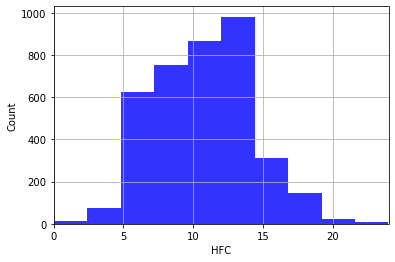

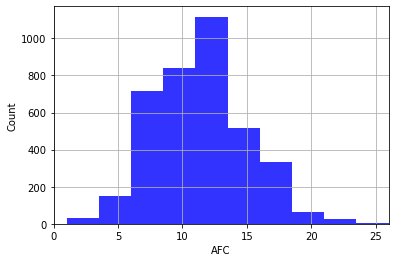

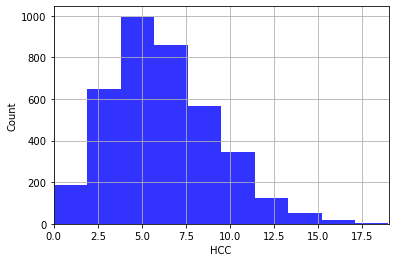

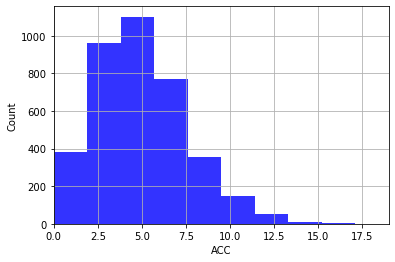

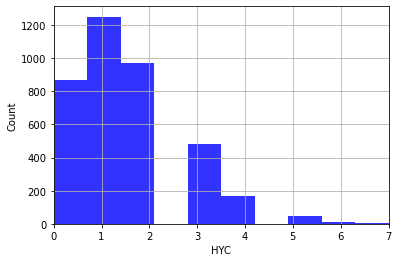

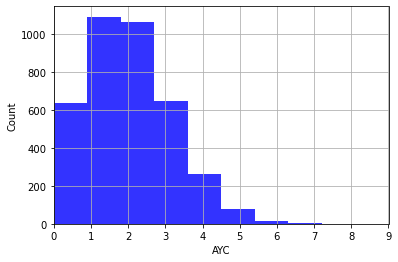

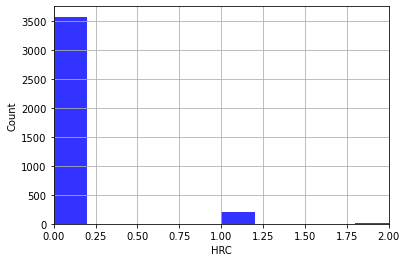

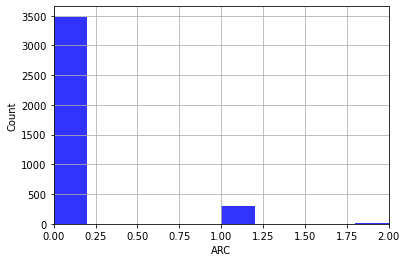

In [14]:
# 나머지 feature에 대해 히스토그램으로 확인
col = [ 'HHG' ,'HAG' ,'HR', 'HSC','ASC', 'HSIP' ,'ASIP', 'HFC' ,'AFC', 'HCC', 'ACC', 'HYC' ,'AYC', 'HRC', 'ARC']
j =6
for i in col:
    lim = EPL_df[i].max()
    ax = EPL_df[i].hist(bins=10, color ='blue',alpha=0.8) # bins가 막대 개수
    ax.set(xlabel=i,ylabel='Count')
    plt.xlim([0,lim])
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()
    j = j+1

 1. 슈팅 기록 (HS, AS)

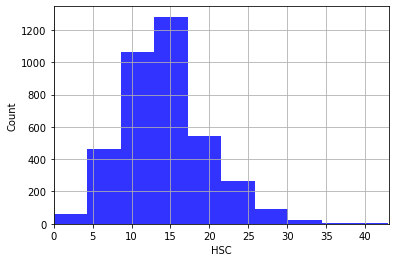

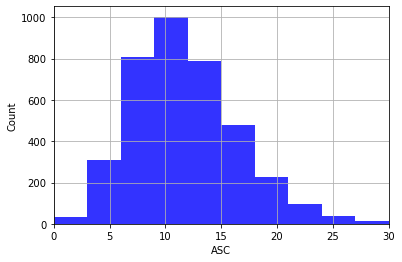

In [15]:
# 1. 슈팅 기록 (HS, AS)
col = [ 'HSC','ASC']

for i in col:
    lim = EPL_df[i].max()
    ax = EPL_df[i].hist(bins=10, color ='blue',alpha=0.8) # bins가 막대 개수
    ax.set(xlabel=i,ylabel='Count')
    plt.xlim([0,lim])
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀이 어웨이 팀보다 더 많은 슈팅을 기록한다

2. 유효 슈팅 기록 (HST, AST)

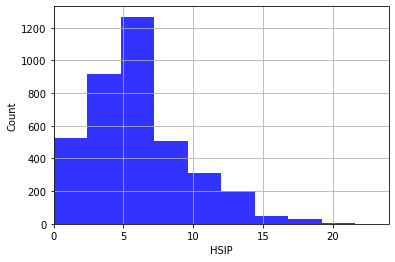

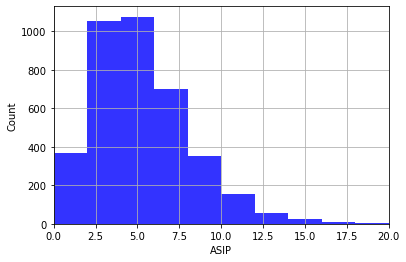

In [16]:
# 2. 유효 슈팅 기록 (HST, AST)
col = [ 'HSIP' ,'ASIP']

for i in col:
    lim = EPL_df[i].max()
    ax = EPL_df[i].hist(bins=10, color ='blue',alpha=0.8) # bins가 막대 개수
    ax.set(xlabel=i,ylabel='Count')
    plt.xlim([0,lim])
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀이 어웨이 팀보다 더 많은 유효 슈팅을 기록한다.

3. 코너킥 기록 (HC, AC)

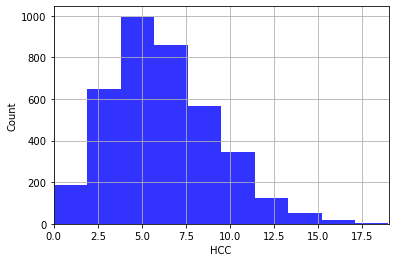

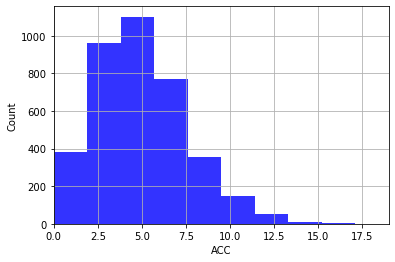

In [17]:
#3. 코너킥 기록 (HC, AC)
col = [ 'HCC', 'ACC']

for i in col:
    lim = EPL_df[i].max()
    ax = EPL_df[i].hist(bins=10, color ='blue',alpha=0.8) # bins가 막대 개수
    ax.set(xlabel=i,ylabel='Count')
    plt.xlim([0,lim])
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀이 어웨이 팀보다 더 많은 코너킥 기회를 얻는다.

4. 반칙 기록 (HF, AF)

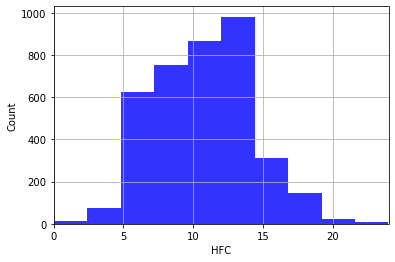

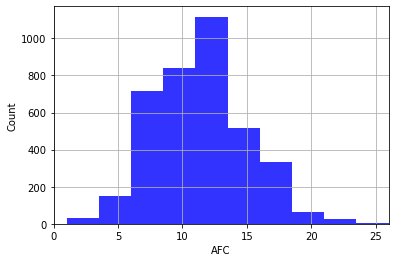

In [18]:
#4. 반칙 기록 (HF, AF)
col = [ 'HFC' ,'AFC']

for i in col:
    lim = EPL_df[i].max()
    ax = EPL_df[i].hist(bins=10, color ='blue',alpha=0.8) # bins가 막대 개수
    ax.set(xlabel=i,ylabel='Count')
    plt.xlim([0,lim])
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

홈 경기를 하는 팀보다 어웨이 팀이 더 많은 반칙을 기록한다.

> 7. 분석 실시

In [19]:
# 홈팀 어웨이팀으로 나뉘어있는 feature를 분석하기 좋게 하나의 새로운 feature로 표현

# 이 부분은 col 부분을 변경해야 함

EPL_df['DIFF_FG']= EPL_df['FHG'] - EPL_df['FAG']
EPL_df['DIFF_HG']= EPL_df['HHG'] - EPL_df['HAG']
EPL_df['DIFF_SHOOT']= EPL_df['HSC'] - EPL_df['ASC']
EPL_df['DIFF_ST']= EPL_df['HSIP'] - EPL_df['ASIP']
EPL_df['DIFF_FOUL']= EPL_df['HFC'] - EPL_df['AFC']
EPL_df['DIFF_CONER']= EPL_df['HCC'] - EPL_df['ACC']
EPL_df['DIFF_YC']= EPL_df['HYC'] - EPL_df['AYC']
EPL_df['DIFF_RC']= EPL_df['HRC'] - EPL_df['ARC']

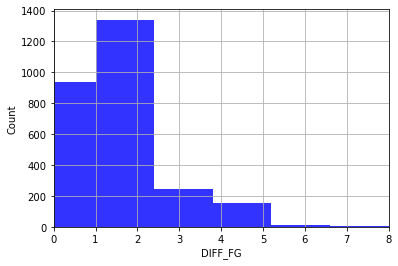

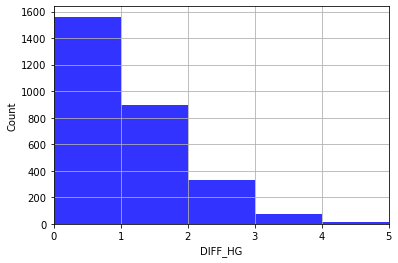

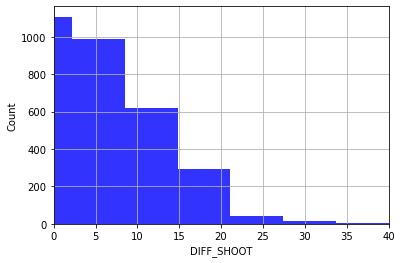

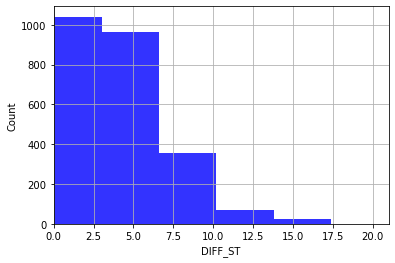

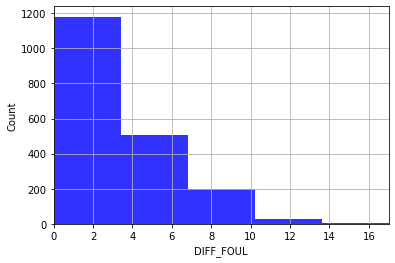

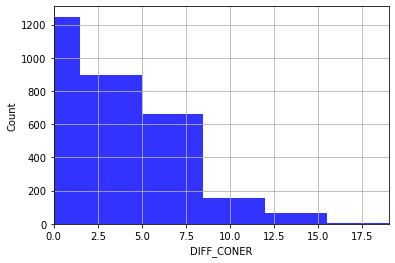

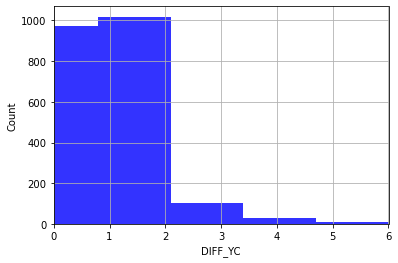

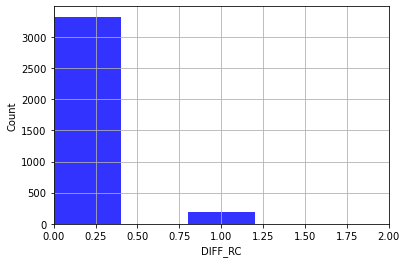

In [20]:
#결과 히스토그램

col = ['DIFF_FG','DIFF_HG','DIFF_SHOOT','DIFF_ST','DIFF_FOUL','DIFF_CONER','DIFF_YC','DIFF_RC']
for i in col:
    lim = EPL_df[i].max()
    ax = EPL_df[i].hist(bins=10, color ='blue',alpha=0.8) # bins가 막대 개수
    ax.set(xlabel=i,ylabel='Count')
    plt.xlim([0,lim])
    plt.savefig(i + ".png", dpi=400, bbox_inches='tight')
    plt.show()

In [21]:
col = ['DIFF_FG','DIFF_HG','DIFF_SHOOT','DIFF_ST','DIFF_FOUL','DIFF_CONER','DIFF_YC','DIFF_RC']
for i in col:
    su = 0
    su = sum(EPL_df[i])/3800
    print(i,su)

DIFF_FG 0.39052631578947367
DIFF_HG 0.16921052631578948
DIFF_SHOOT 2.9521052631578946
DIFF_ST 1.2502631578947367
DIFF_FOUL -0.5147368421052632
DIFF_CONER 1.2539473684210527
DIFF_YC -0.29289473684210526
DIFF_RC -0.02763157894736842


- DIFF_FG:풀 타임 경기 결과. 양수인 것을 보아 홈 팀이 경기를 이긴 표본이 더 많다는 것을 의미한다.
- DIFF_HG:하프타임 경기 결과. 양수인 것을 보아 홈 팀이 하프타임(45)까지 경기를 이긴 표본이 더 많다는 것을 의미한다.
- DIFF_SHOOT:풀 타임 경기 총 슈팅 횟수. 양수인 것을 보아 홈 팀이 경기를 좀 더 공격적으로 가져간 표본이 더 많다는 것을 의미한다.
- DIFF_ST:풀 타임 경기 유효 슈팅 횟수. 양수인 것을 보아 홈 팀이 경기를 좀 더 공격적으로 가져간 표본이 더 많다는 것을 의미한다.
- DIFF_FOUL:풀 타임 파울 횟수. 음수인 것을 보아 어웨이 팀이 반칙을 더 많이 한 표본이 더 많다는 것을 의미한다.
- DIFF_CONER:풀 타임 코너킥 횟수. 양수인 것을 보아 홈 팀이 세트피스 공격기회를 많이 얻은 표본이 더 많다는 것을 의미한다.
- DIFF_YC:풀 타임 옐로카드 갯수. 음수인 것을 보아 어웨이 팀이 반칙을 더 많이 한 표본이 많다는 것을 의미한다.
- DIFF_RC:풀 타임 레드카드 갯수. 위와 동일하다.

결론적으로는 HomeTeam이 경기를 이길 확률이 높다.

* 같은 특징의 feature임에도 팀에 따라 feature가 2개로 나뉜다.
* 특징을 한 눈에 보기 위해서 feature를 1개로 요약하였다.
* 홈/어웨이로 나뉘어있는 feature에 대해 (홈 팀 관련 속성값 — 어웨이 팀 관련 속성 값) 을 해서 새로운 feature를 생성했다.

* (홈 팀 관련 속성값 — 어웨이 팀 관련 속성값)이므로 양수 값이면 홈 팀이 그 항목에대해 우위이고, 음수 값이면 어웨이 팀이 우위이다.
* 홈 팀은 대체적으로 지배하는 경기를 펼치려 한다
* 어웨이 팀은 대체적으로 수비적인 경기 운영을 펼친다
* 홈 팀은 지고 있는 상황에서도 더욱 공격적으로 플레이 한다.
* 어웨이 팀이 이길 때는 적은 골을 넣고 수비를 더 강화한다.

> 8. 학습 데이터 준비

1. 패키지 불러오기

In [22]:
# train / test split
from sklearn.model_selection import train_test_split

2. input 데이터 선별

In [23]:
# 필요한 feature만 뽑아 새로운 df에 저장
EPL_df_ext = EPL_df[['FR', 'HSC','ASC', 'HSIP','ASIP','HFC','AFC','HCC','ACC','HYC','AYC','HRC','ARC']]

In [24]:
#FTR 무승부 지우고 BINARY 형태로
EPL_df_ext = EPL_df_ext[EPL_df_ext.FR != 'D']
EPL_df_ext['RESULT'] = np.where(EPL_df_ext['FR'] == 'H',1,0)
EPL_df_ext.drop('FR', axis=1, inplace=True)

* 학습에 사용할 numeric type의 feature만 추출
* 무승부까지 예측하기는 어려울 것으로 판단하여 무승부에 해당하는 인스턴스는 삭제

3. Training / Test set split

In [25]:
# 데이터 내에서 학습 집합과 테스트 집합을 나눔(8:2)
train, test = train_test_split(EPL_df_ext, test_size=0.2, random_state=12)

X_train = train.drop("RESULT", axis=1)
Y_train = train["RESULT"]
X_test = test.drop("RESULT", axis=1)
Y_test = test["RESULT"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2288, 12), (2288,), (572, 12), (572,))

* Train_test_split을 활용하여 8:2의 비율로 학습 집합과 테스트 집합을 나눔

> 9.경기 결과 학습 및 예측에 대한 가정

* 팀 단위로 볼 때 경기수가 많지 않아 각 팀의 특징을 학습하기는 어려움
* 홈팀과 어웨이팀의 경기 기록 분포에 차이가 있음을 확인
* 각 팀에 대한 특징을 고려하는 것이 아닌홈 / 어웨이에 대한 특징을 고려하여 학습
* 홈/어웨이에 따른 축구 경기 자체를 학습하는 것이므로 프리미어리그가 아니더라도 모든 축구 경기에 대한 예측 가능

> 10. ML Model 사용 예측 수행

1. 패키지 불러오기

In [26]:
# 기계 학습
from sklearn.linear_model import LogisticRegression
from  sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # 이산형이 아닌 연속형에 대한
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans


> Support Vector Machines

In [27]:
# Support Vector Machines
# SVM 모델 학습
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) *100, 2)
acc_svc

73.78

> Logistic Regression

In [28]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
#Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test)
acc_log =round(logreg.score(X_test, Y_test)* 100, 2)
# 소수점 둘째 자리까지 출력
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


73.6

> k-Nearest Neighbor

In [29]:
knn = KNeighborsClassifier(n_neighbors =3 )
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn= round(knn.score(X_test, Y_test)*100, 2)
acc_knn

66.43

> Naive Bayes classifiers

In [30]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test)*100,2)
acc_gaussian

69.41

> Decision tree

In [31]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test)*100,2)
acc_decision_tree

62.76

> Artificial Neural Network

In [32]:
#Artificial Neural Network
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes =(30,10), random_state=1)
ANN.fit(X_train, Y_train)
Y_pred_ANN = ANN.predict(X_test)
acc_ANN = round(ANN.score(X_test, Y_test)*100, 2)
acc_ANN

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


71.33

> Keras : ANN Model

In [33]:
# Keras : ANN Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim=12))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=40, batch_size=32, validation_split=0.2)
performance_test = model.evaluate(X_test,Y_test, batch_size=32)
classes = model.predict(X_test, batch_size=128)
performance_test

Epoch 1/40
58/58 [==============================] - 1s 10ms/step - loss: 0.8163 - accuracy: 0.6295 - val_loss: 0.5782 - val_accuracy: 0.6921
Epoch 2/40
58/58 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6661 - val_loss: 0.5542 - val_accuracy: 0.7271
Epoch 3/40
58/58 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.6929 - val_loss: 0.5541 - val_accuracy: 0.7205
Epoch 4/40
58/58 [==============================] - 0s 3ms/step - loss: 0.5503 - accuracy: 0.7246 - val_loss: 0.5366 - val_accuracy: 0.7293
Epoch 5/40
58/58 [==============================] - 0s 3ms/step - loss: 0.5535 - accuracy: 0.7311 - val_loss: 0.5369 - val_accuracy: 0.7358
Epoch 6/40
58/58 [==============================] - 0s 3ms/step - loss: 0.5498 - accuracy: 0.7224 - val_loss: 0.5404 - val_accuracy: 0.7162
Epoch 7/40
58/58 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7306 - val_loss: 0.5323 - val_accuracy: 0.7380
Epoch 8/40
58/58 [=

[0.5705196261405945, 0.7220279574394226]

# VIII. 추가 분석 자료
추가분석 1. 앙상블 모델 만들기

* 예측 정확도 상위 3개의 모델 활용 [로지스틱 회귀 / ANN / Keras-ANN]
* 과반수 이상이 예측한 결과를 실제 예측값으로 활용

Bagging 기법과 Voting 기법의 가장 큰 차이점은 바로 하나의 단일 알고리즘을 여러 개를 사용하는 방식인지, 아니면 다양한 알고리즘을 동일한 샘플 dataset에 적용하는 방식인지에 그 차이가 있습니다.

Bagging 기법은 보통 단일 알고리즘에 서로 다른 샘플링된 dataset을 학습한 뒤, 이에 대한 투표로 결정하는 방식입니다. 비교적 Voting기법보다 사용성이 좋다는 말은 바로 단일 알고리즘을 사용하기 때문에, 단일 알고리즘에 대한 hyperparameter만 잘 해주면 됩니다.

In [34]:
#report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_ANN))

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       218
           1       0.76      0.79      0.77       354

    accuracy                           0.71       572
   macro avg       0.70      0.69      0.69       572
weighted avg       0.71      0.71      0.71       572



In [35]:
#앙상블 모델 만들기
score=[]
for i in range(0,len(Y_pred_logreg)):
    list =[]
    #list.append(Y_pred_knn[i])
    #list.append(Y_pred_DT[i])
    #list.append(Y_pred_NB[i])
    list.append(Y_pred_svc[i])
    list.append(Y_pred_logreg[i])
    list.append(Y_pred_ANN[i])
    list.append(classes[i])
    if list.count(1) > list.count(0): 
        score.append(1)
    else:
        score.append(0)

In [36]:
ensemble = pd.DataFrame({
    "result": Y_test,
    "prediction":score
})
ensemble['RESULT'] = np.where(ensemble["result"]==ensemble["prediction"], 1, 0)

In [37]:
#앙상블모델 정확도
acc_Ens = round(((sum(ensemble['RESULT'])/len(Y_pred_logreg)))*100,2)
acc_Ens

73.78

* 모델 정확도 면에서 가장 좋은 ANN 보다는 약 1% 낮고,
평균 정확도 보다는 약 4% 높음.

추가분석 2. 앙상블 모델로 최근 경기 예측하기

> 데이터 로딩 및 모델 불러오기

In [38]:
# 데이터 로딩
Eval_df = pd.read_csv('경기 예측.csv', encoding='CP949')
X_eval = Eval_df[['HSC', 'ASC', 'HSIP', 'ASIP', 'HFC', 'AFC', 'HCC', 'ACC', 'HYC', 'AYC', 'HRC', 'ARC']]
Y_eval = Eval_df[['FTR']]

In [39]:
E_pred_logreg = logreg.predict(X_eval)
E_pred_ANN = ANN.predict(X_eval)
temp = model.predict(X_eval, batch_size=128)
j =0
E_pred_Keras_ANN = []
for i in temp:
    E_pred_Keras_ANN.append(int(round(i[0])))
    j+=1
E_pred_Keras_ANN = np.array(E_pred_Keras_ANN)

In [40]:
#West Brom vs. Crystal Palace
list=[]

#a값이 3개이므로
for i in range(0,3):
    #list.append(E_pred_knn[i])
    #list.append(E_pred_decision_tree[i])
    #list.append(E_pred_gaussian[i])
    #list.append(E_pred_svc[i])
    list.append(E_pred_logreg[i])
    list.append(E_pred_ANN[i])
    list.append(E_pred_Keras_ANN[i])
if list.count(1) > list.count(0): 
    print('West Brom vs. Crystal Palace : ', "H")
else:
    print('West Brom vs. Crystal Palace : ', "A")

West Brom vs. Crystal Palace :  H


In [41]:
#Sheffield vs. Leicester
list=[]

#a값이 3개이므로
for i in range(4,7):
    #list.append(E_pred_knn[i])
    #list.append(E_pred_decision_tree[i])
    #list.append(E_pred_gaussian[i])
    #list.append(E_pred_svc[i])
    list.append(E_pred_logreg[i])
    list.append(E_pred_ANN[i])
    list.append(E_pred_Keras_ANN[i])
if list.count(1) > list.count(0): 
    print('Sheffield vs. Leicester : ', "H")
else:
    print('Sheffield vs. Leicester : ', "A")

Sheffield vs. Leicester :  A


In [43]:
#Tottenhan vs. Arsenal
list=[]

#a값이 3개이므로
for i in range(7,10):
    #list.append(E_pred_knn[i])
    #list.append(E_pred_decision_tree[i])
    #list.append(E_pred_gaussian[i])
    #list.append(E_pred_svc[i])
    list.append(E_pred_logreg[i])
    list.append(E_pred_ANN[i])
    list.append(E_pred_Keras_ANN[i])
if list.count(1) > list.count(0): 
    print('Tottenhan vs. Arsenal : ', "H")
else:
    print('Tottenhan vs. Arsenal : ', "A")

Tottenhan vs. Arsenal :  H
